# Quels tendancent on les variables ?

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Charger les données d'entrainement

In [2]:
df_train = pd.read_csv("data/train.csv")

ids = df_train["ID"]
target = df_train["TARGET"]
features = df_train.drop(columns=["TARGET", "ID"], errors='ignore').copy()

## On va mettre à l'échelle les données

In [8]:
def clean_special_codes(df):
    df = df.copy
    max_dict = df.max().to_dict()

    for col in df.columns:
        data = df[col]

        # Remplacer les NaN
        data = data.fillna(-1)

        max_val = max_dict[col]

        if max_val in [9, 99, 999]:
            # Valeurs "non réponse"
            data = data.replace(max_val, -1)

            # Valeurs "jamais fait / non concerné"
            if max_val == 9:
                data = data.replace([8, 7], 0)
            elif max_val == 99:
                data = data.replace([88, 77], 0)
            elif max_val == 999:
                data = data.replace([888, 777], 0)

        df[col] = data

    return df

features = clean_special_codes(features)


In [9]:
features_nan = features.isna().sum(axis = 0) / len(features)
print(features_nan)

_STATE      0.0
FMONTH      0.0
IDATE       0.0
IMONTH      0.0
IDAY        0.0
           ... 
_DRNKWK2    0.0
_RFDRHV8    0.0
_FLSHOT7    0.0
_PNEUMO3    0.0
_AIDTST4    0.0
Length: 323, dtype: float64


In [10]:
columns_of_interest = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVRISK5', 'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2', 'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHSTRE1', 'MARIJAN1', 'MARJSMOK']

In [11]:
from CRS.html_parser import parse_html

parsed, parsed_dict = parse_html(filename="USCODE22_LLCP_102523.HTML")



 working directory
/Users/thomas/SDD/mini-hackaton



opening file ...
File read

File parsed



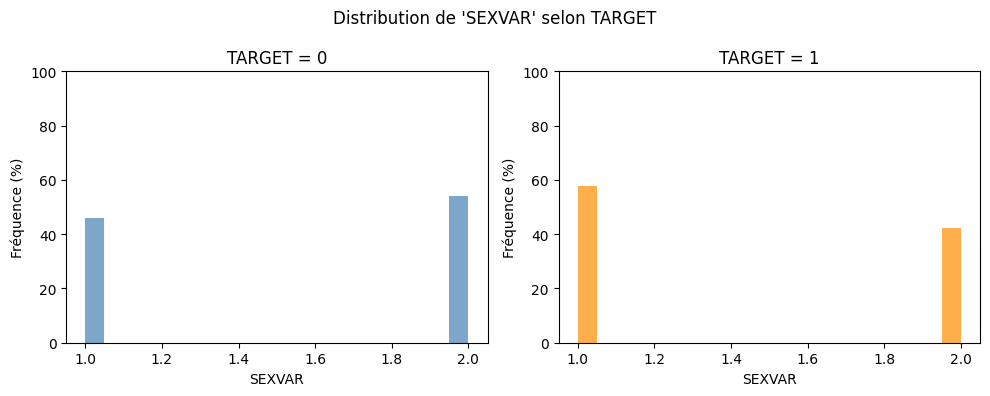

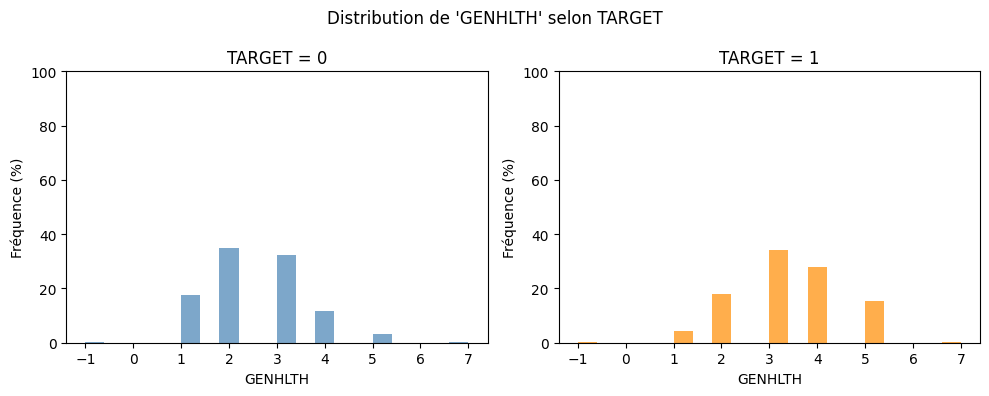

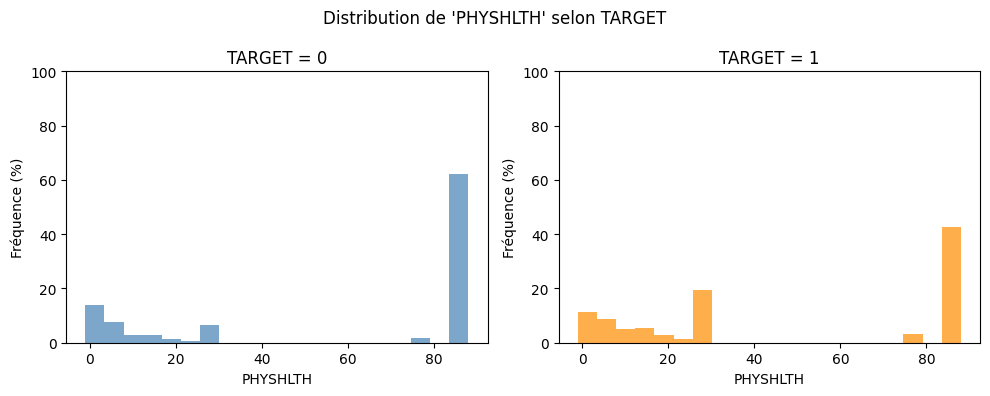

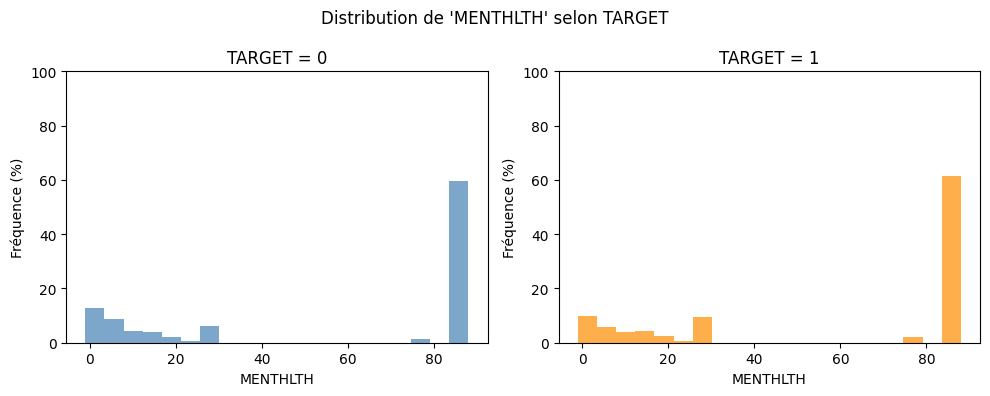

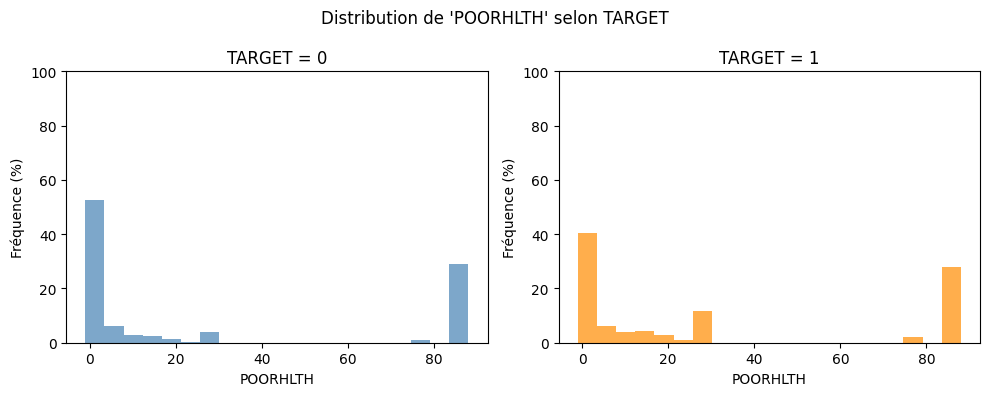

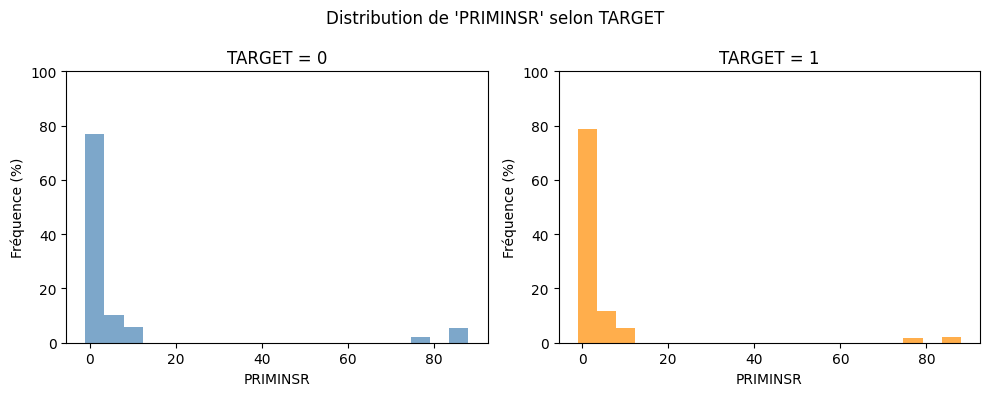

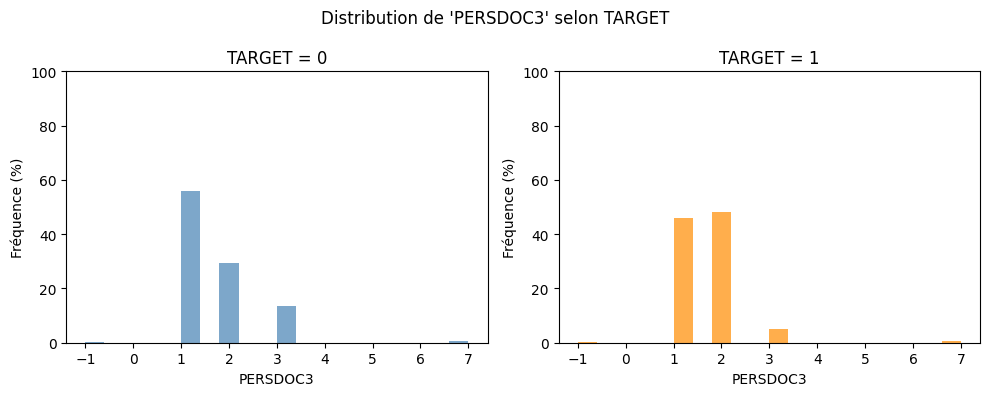

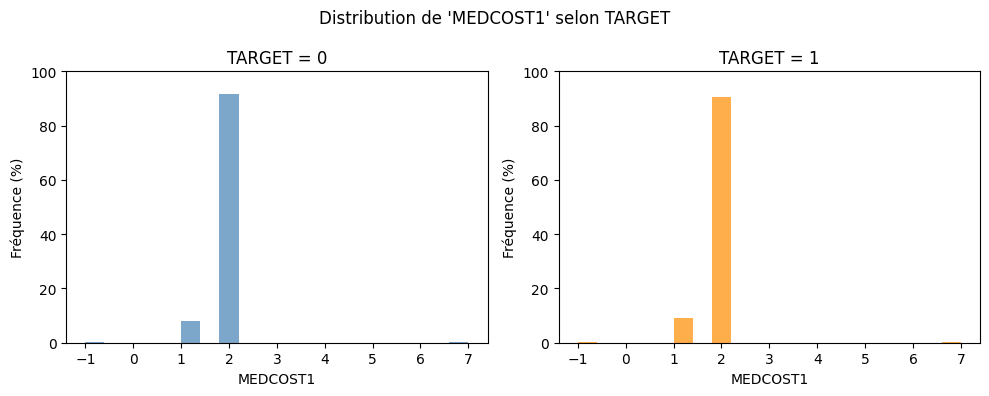

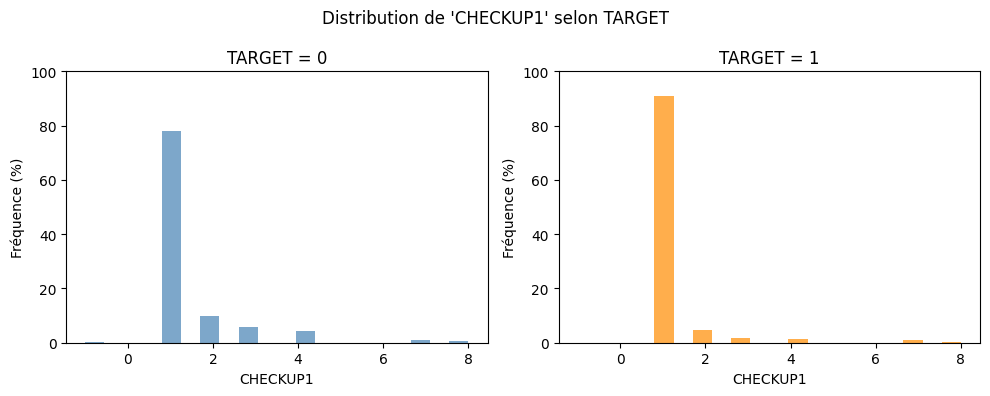

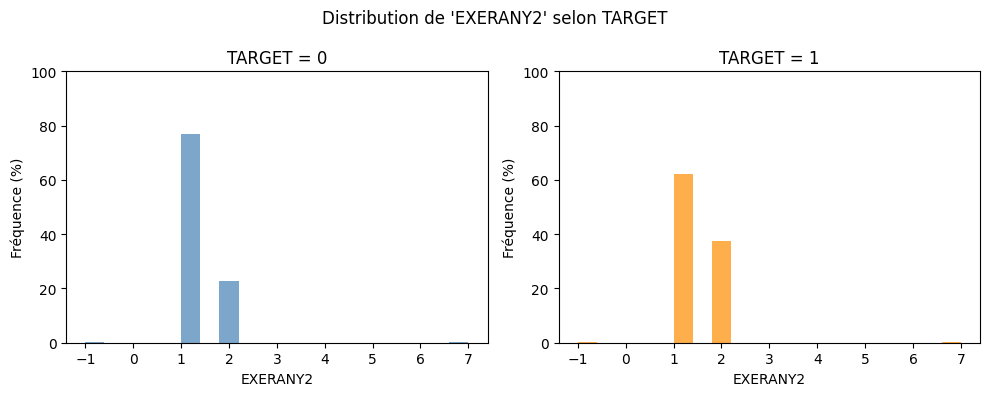

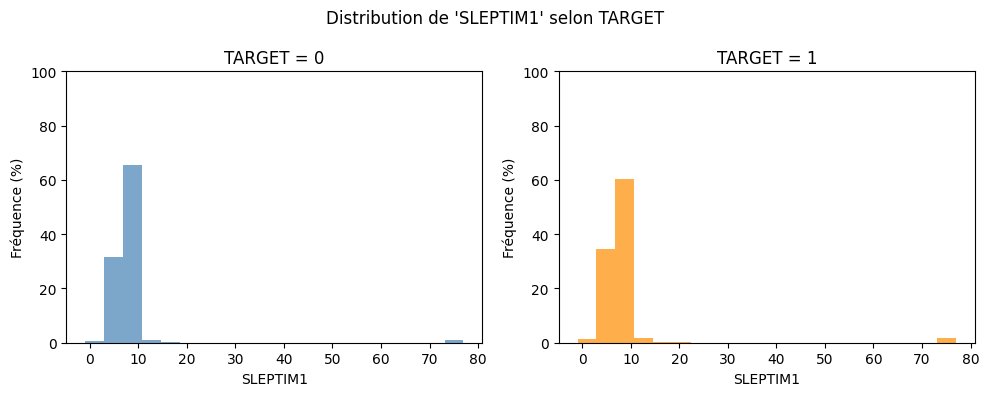

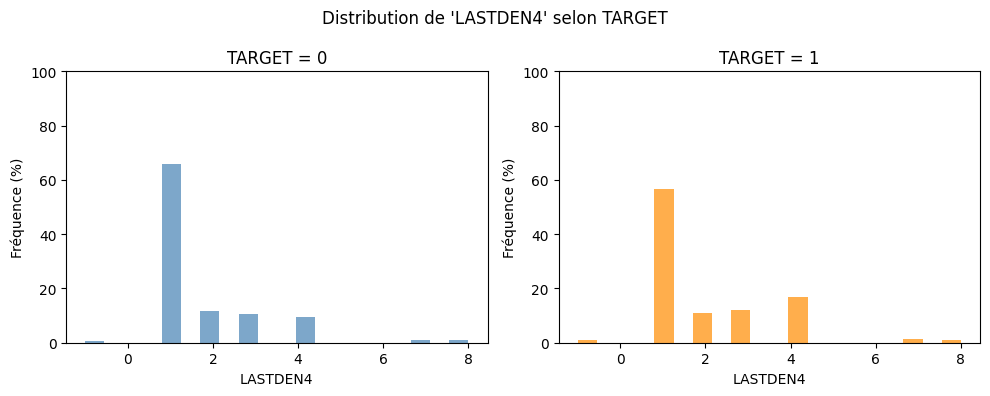

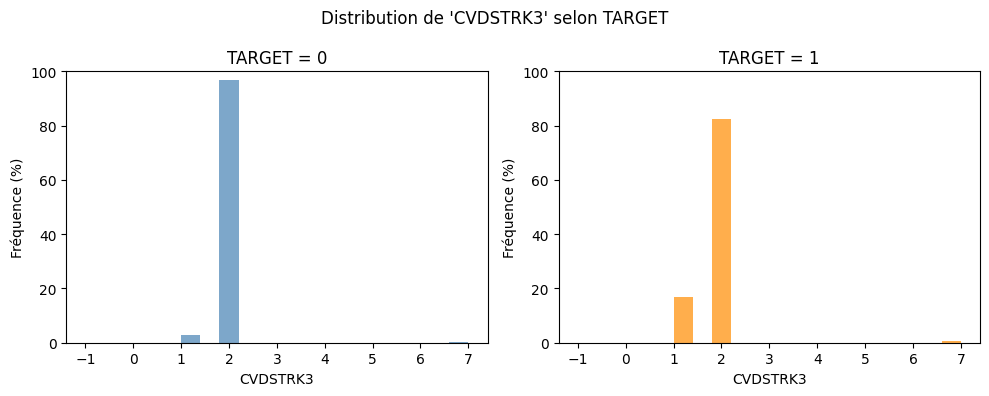

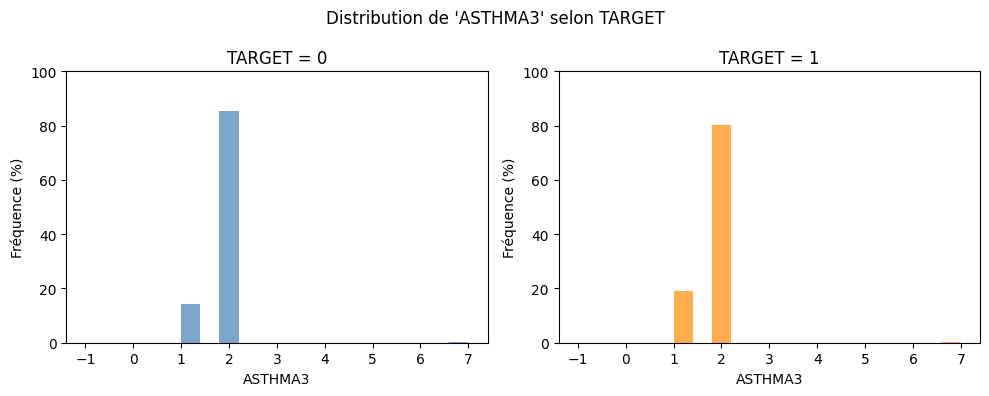

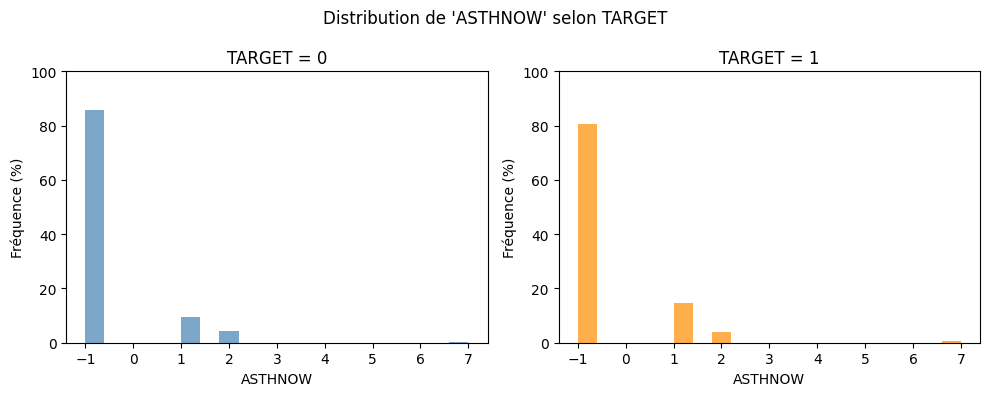

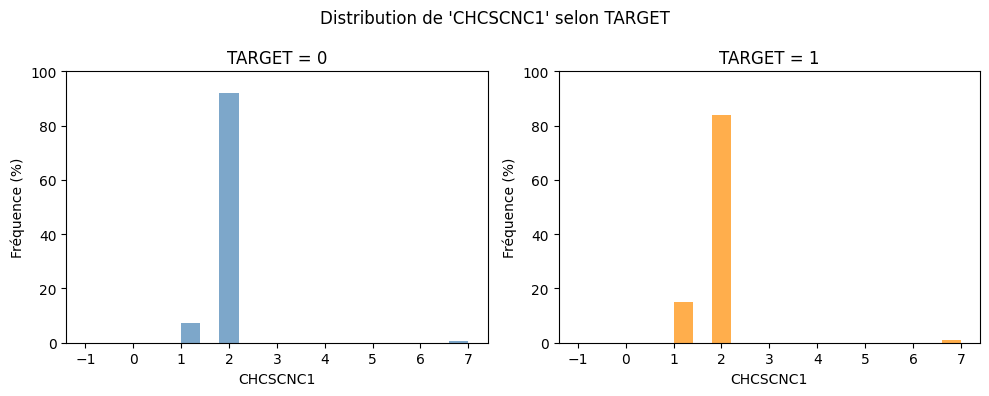

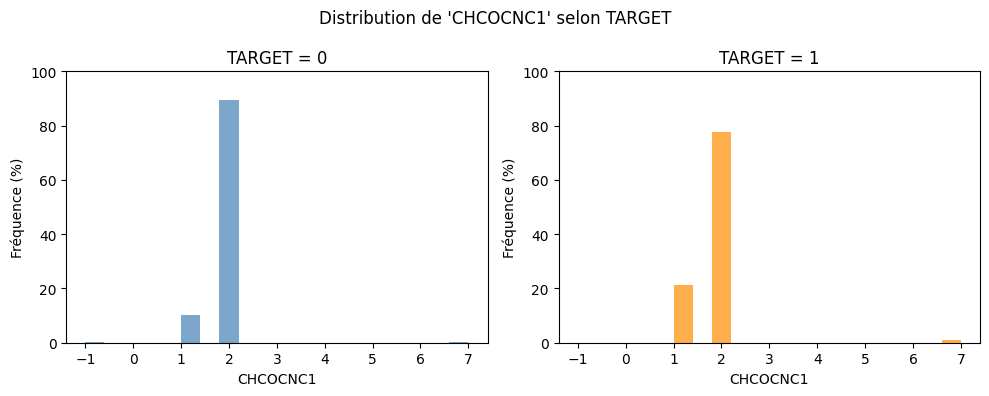

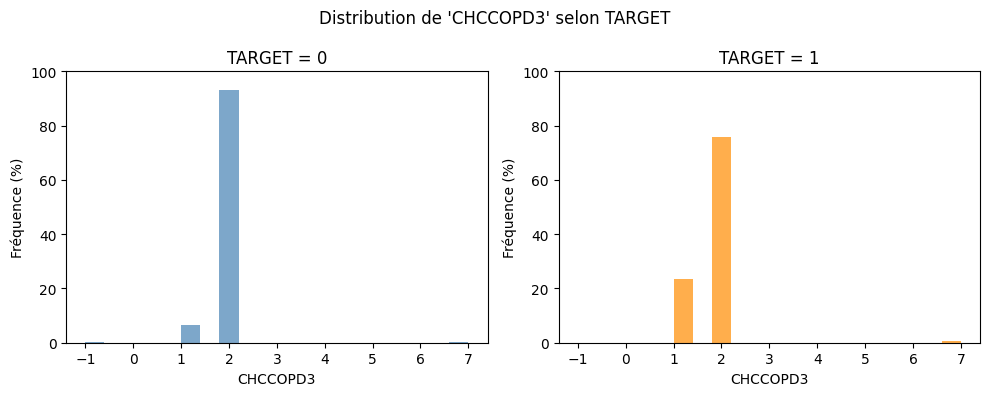

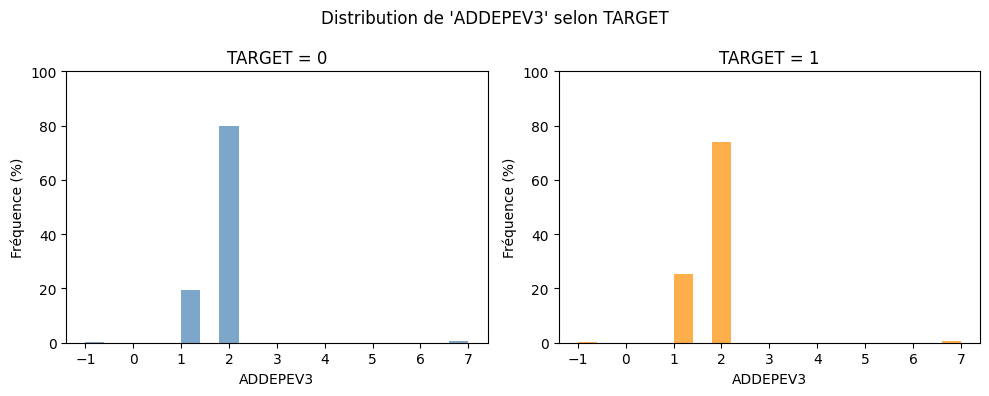

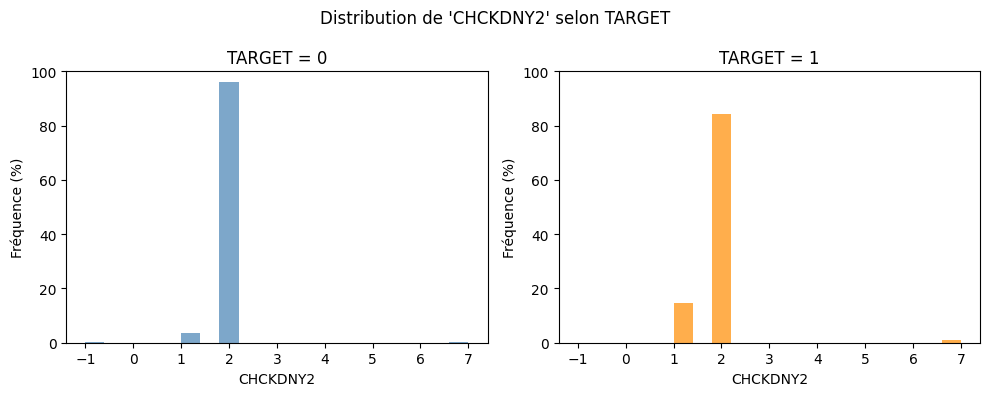

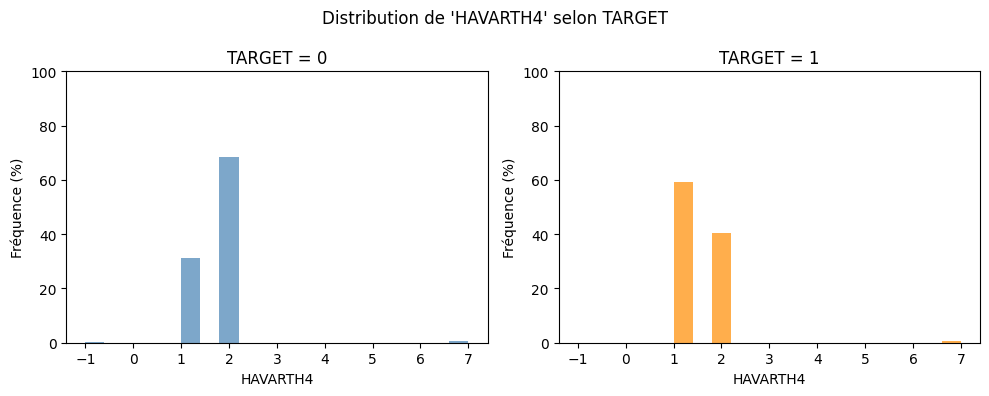

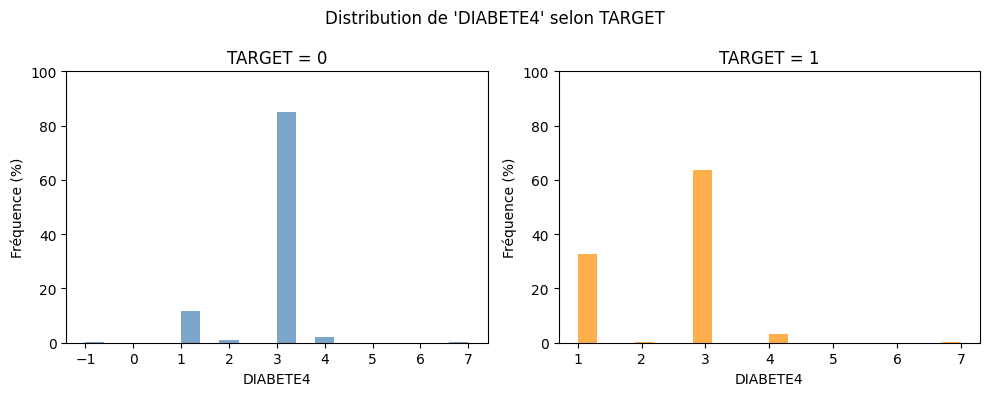

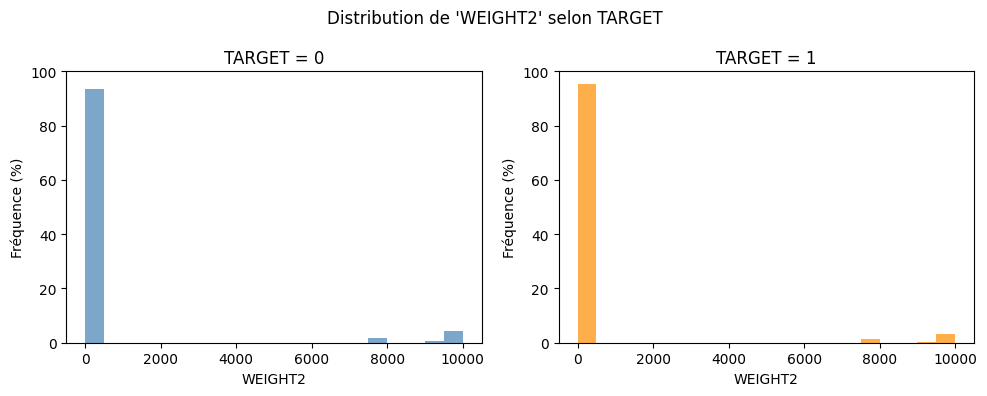

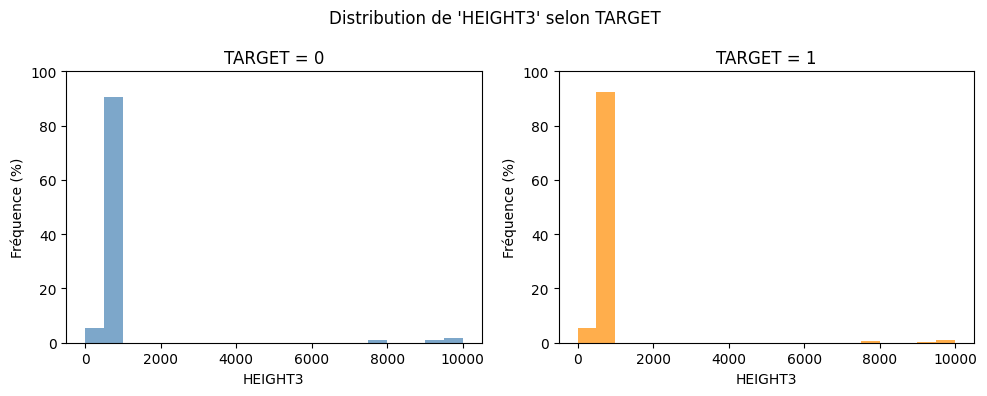

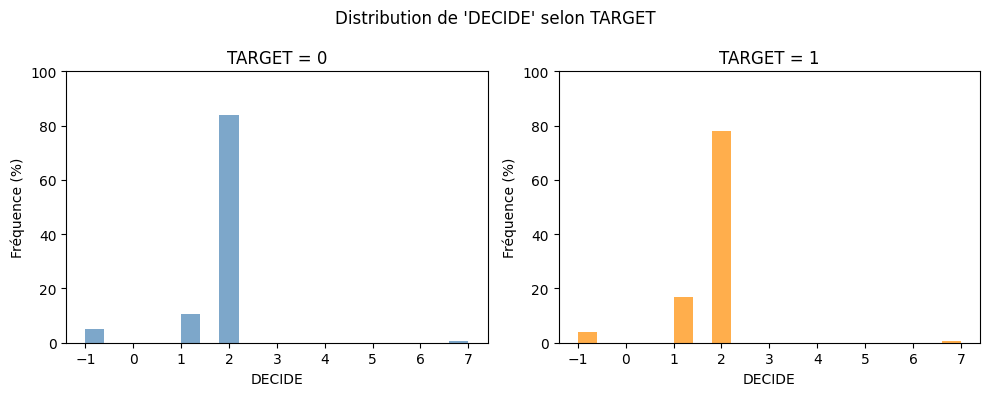

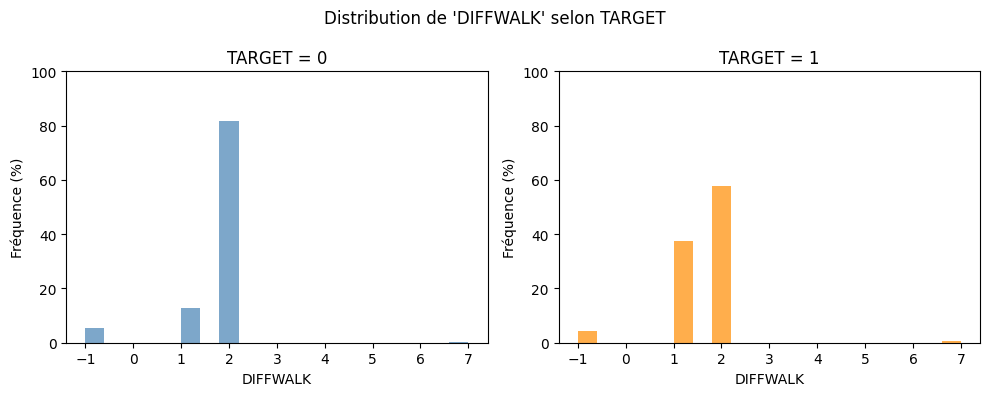

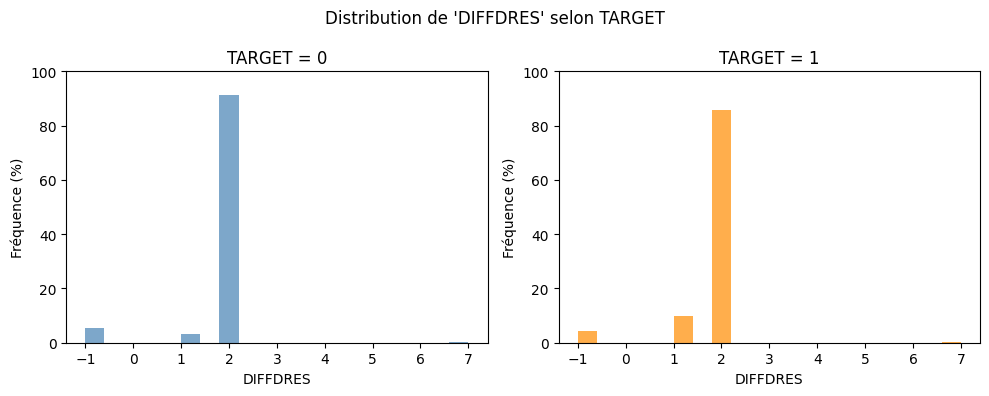

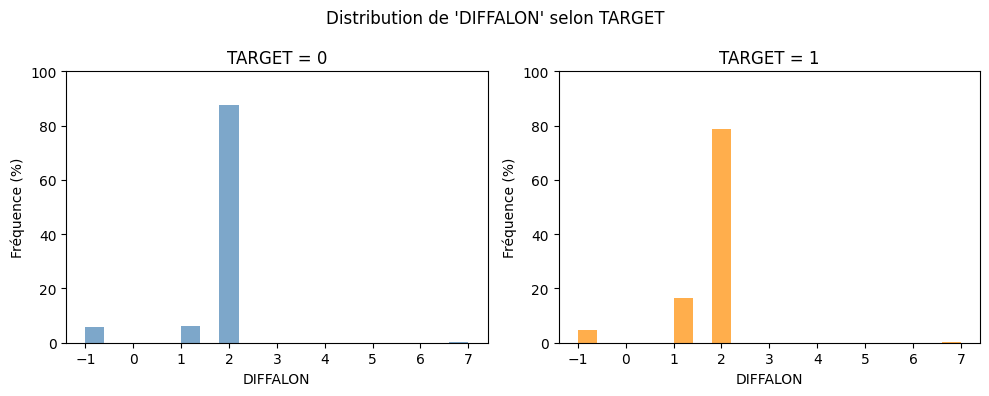

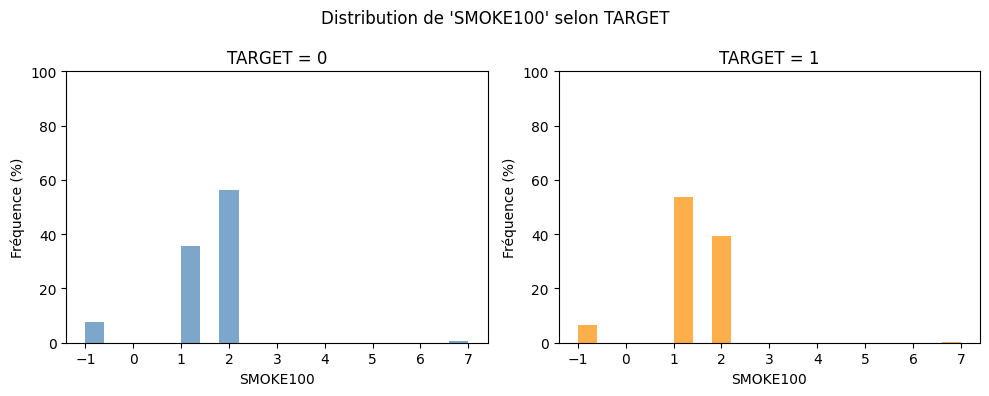

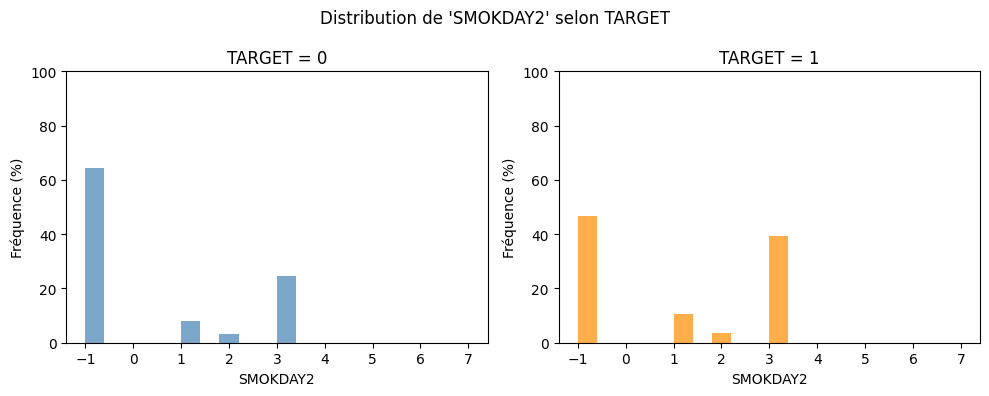

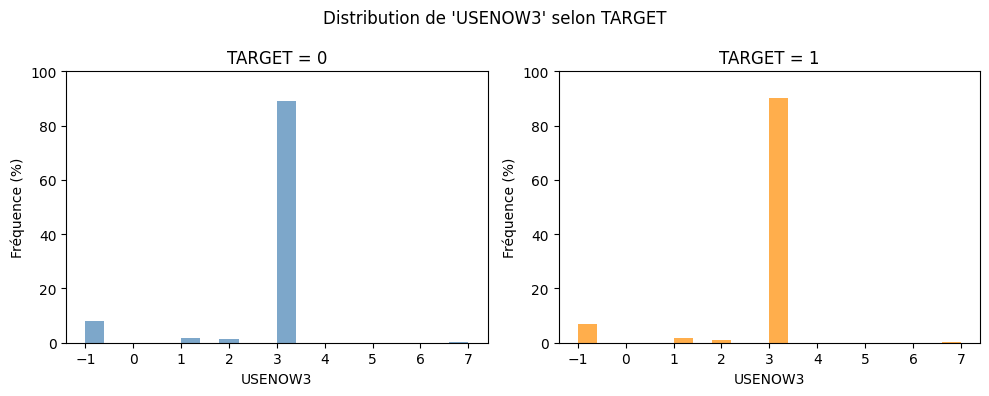

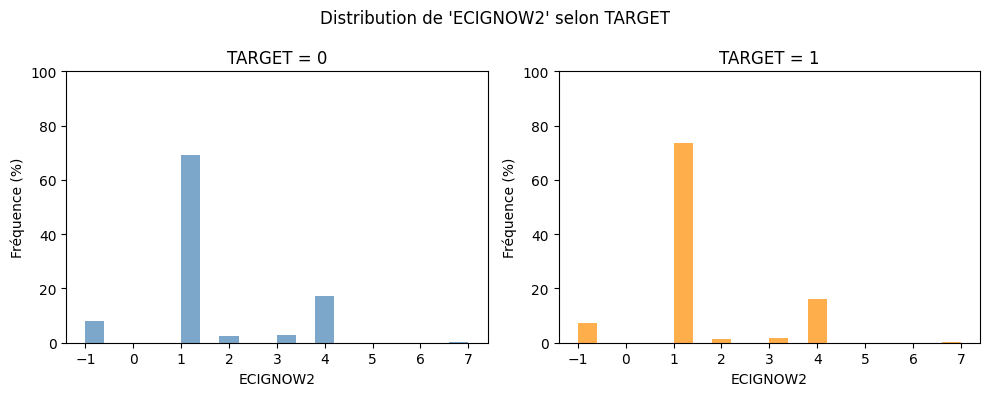

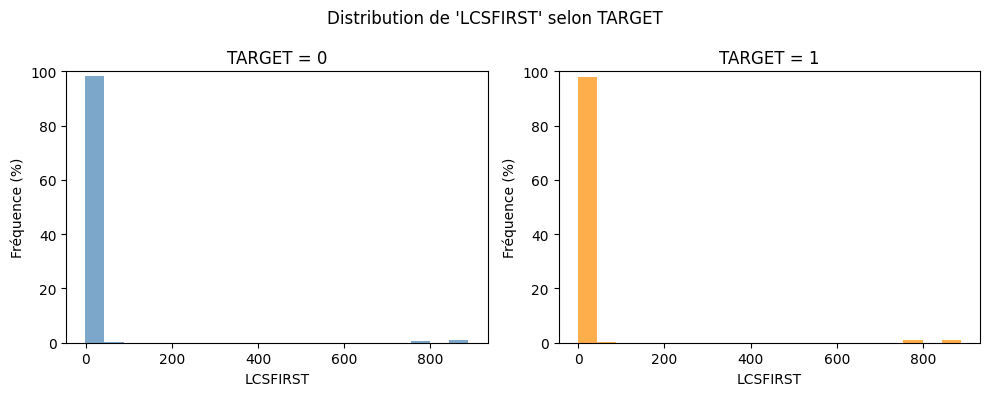

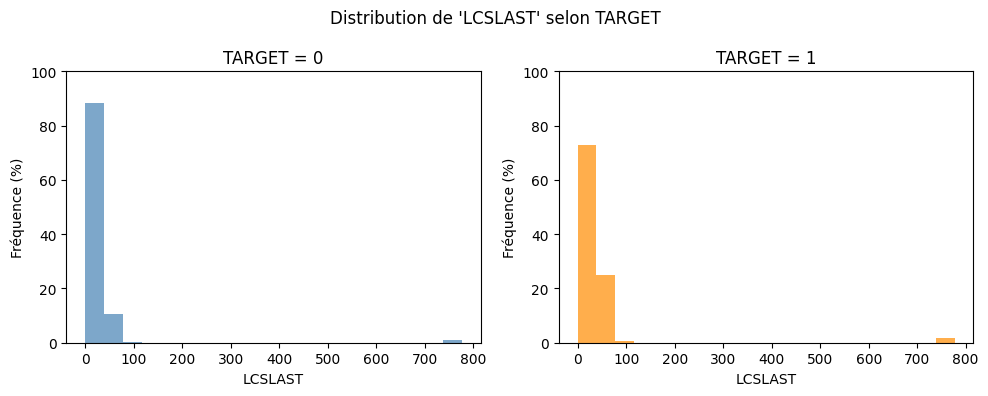

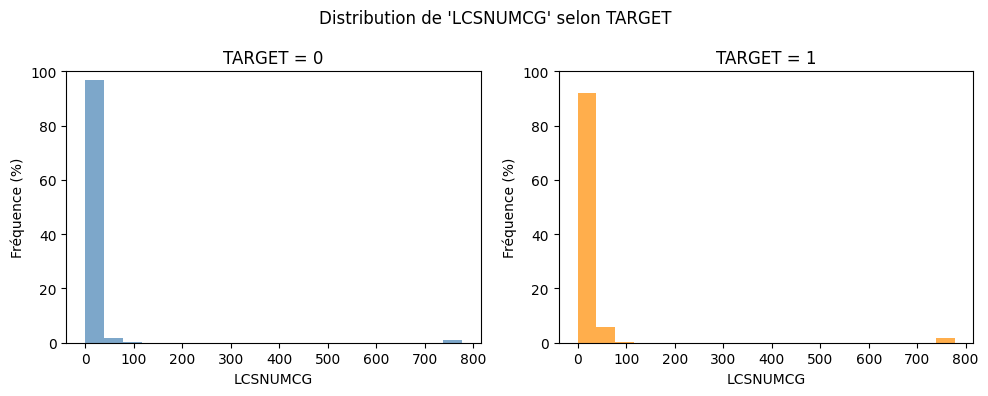

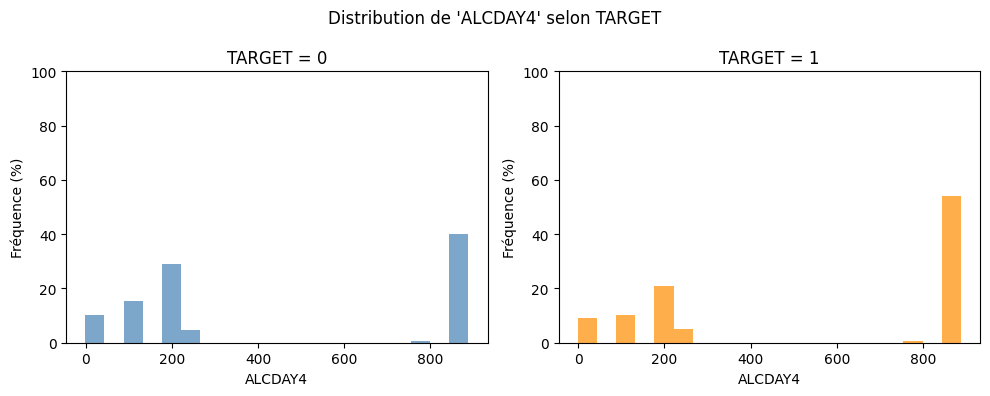

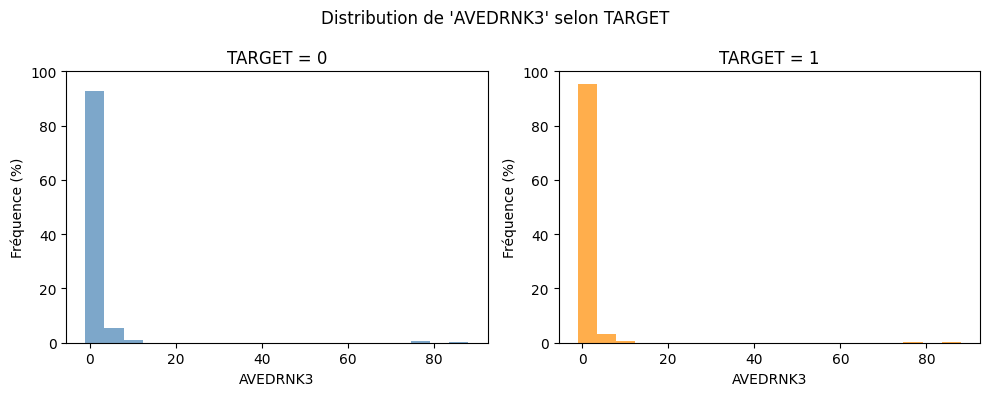

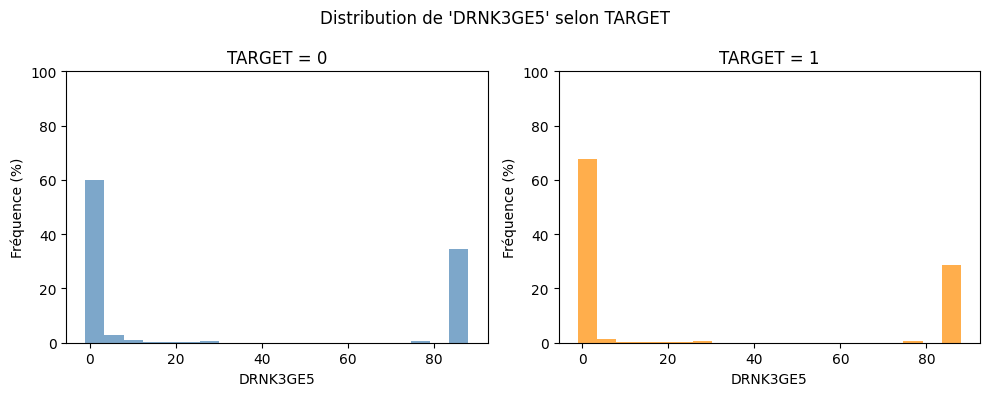

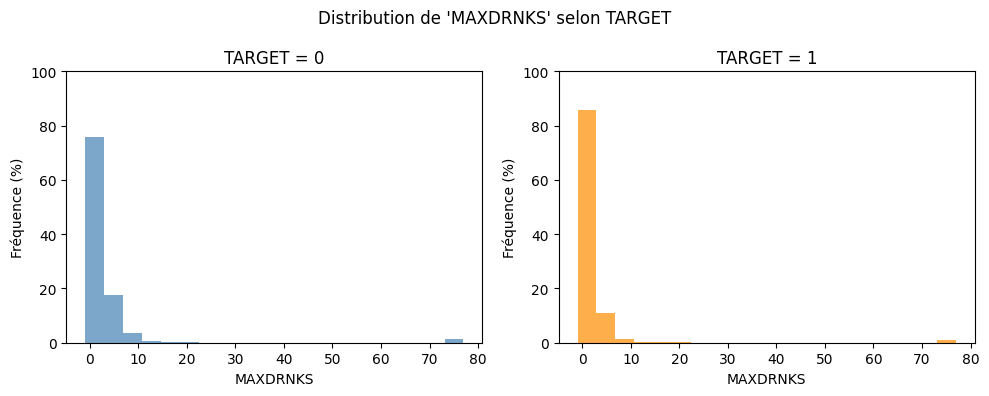

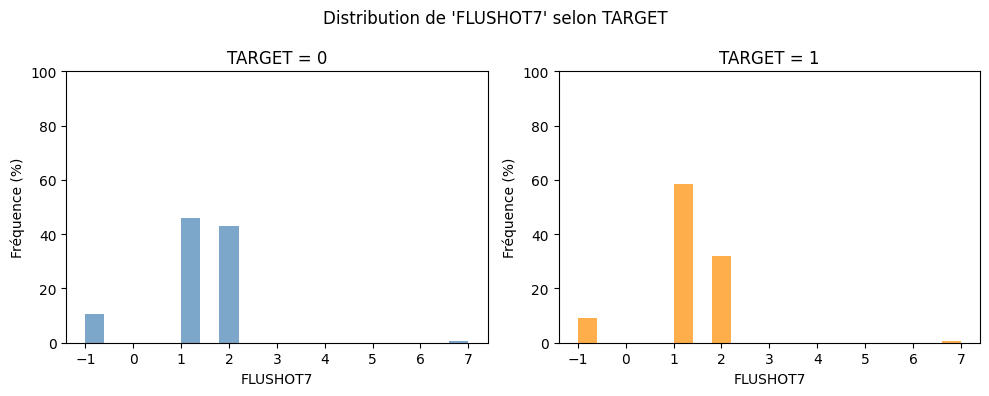

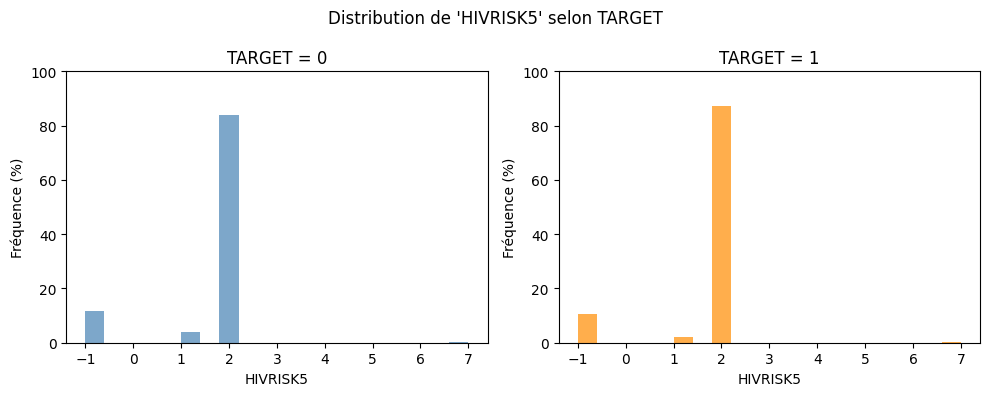

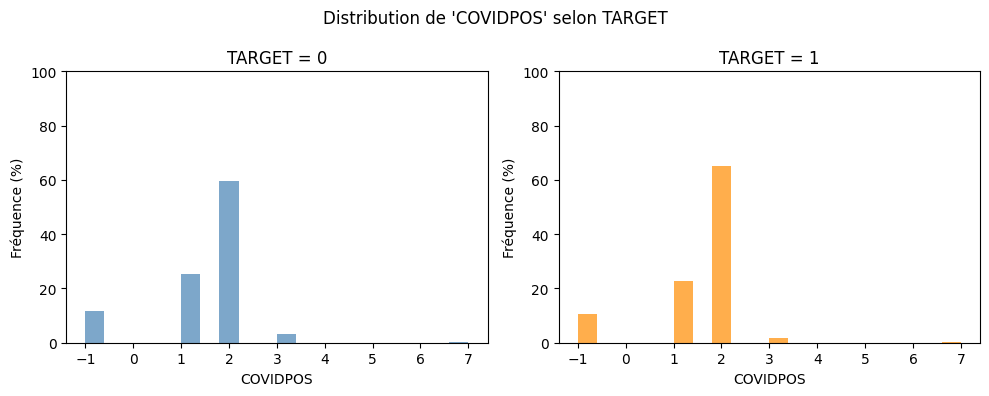

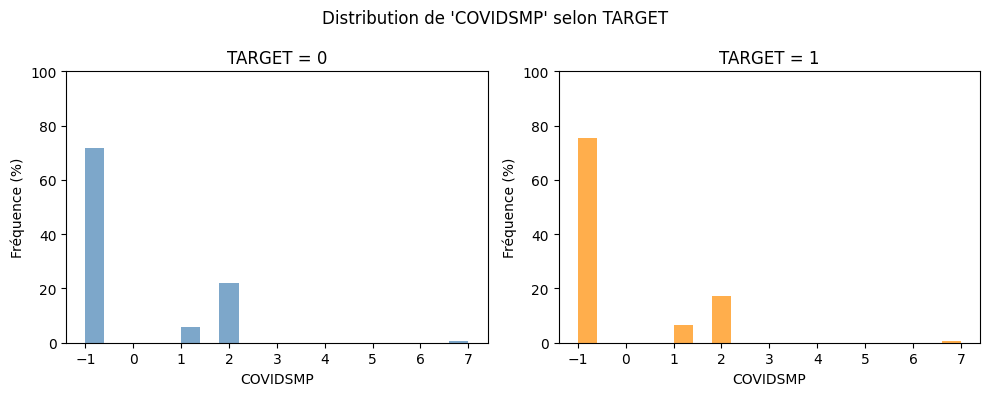

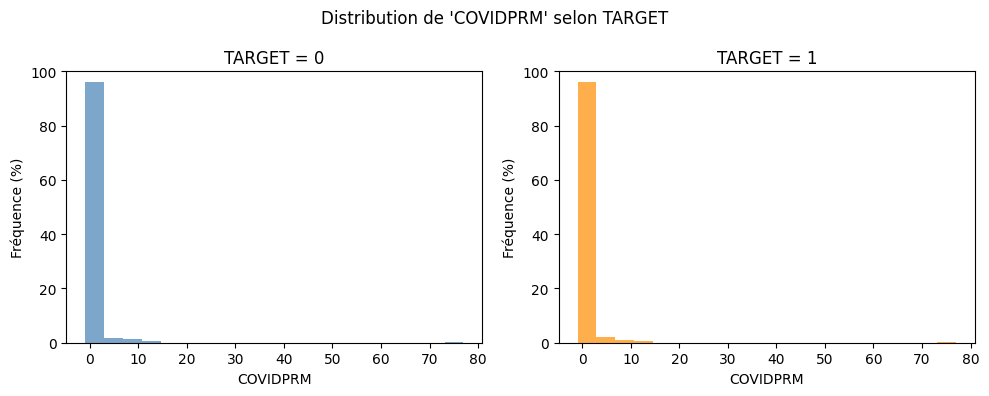

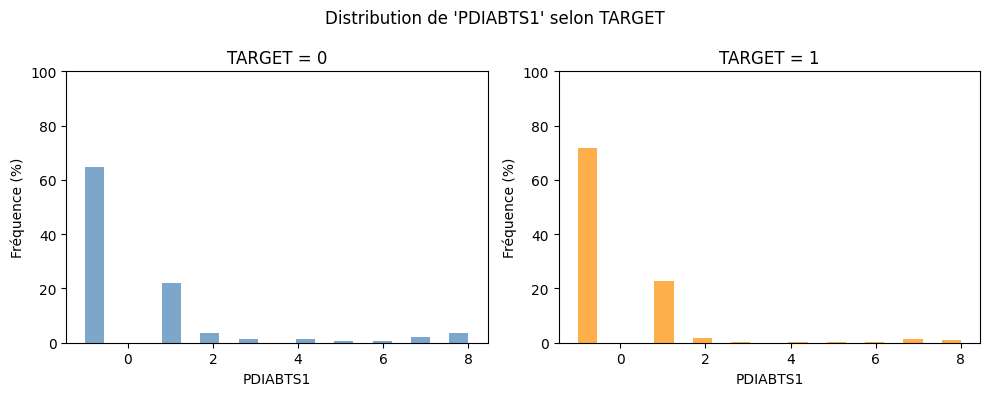

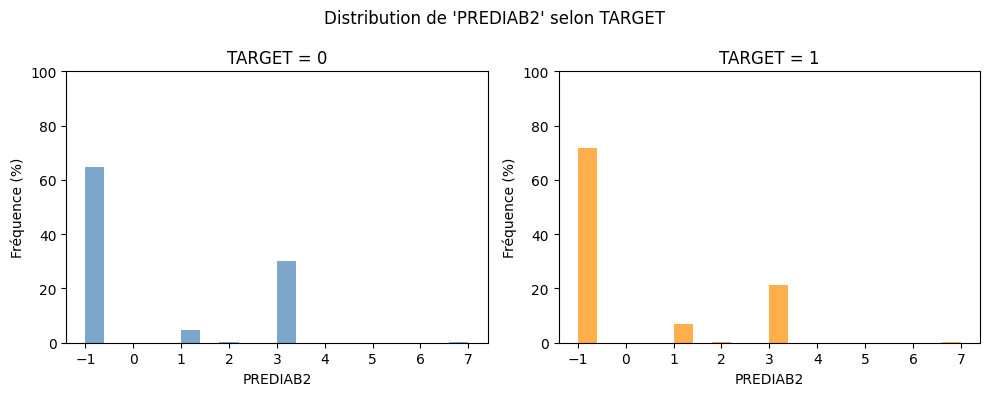

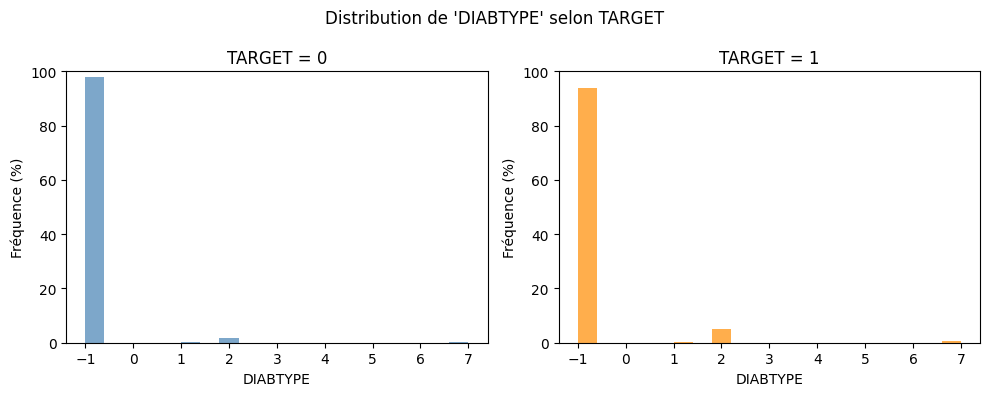

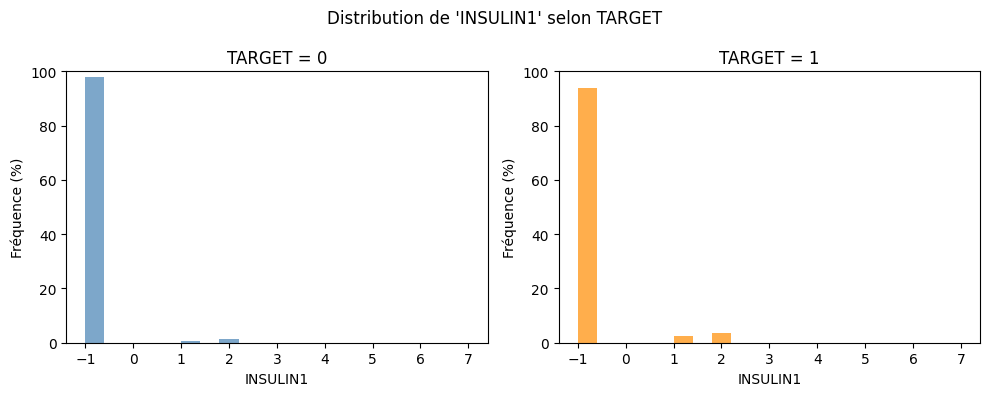

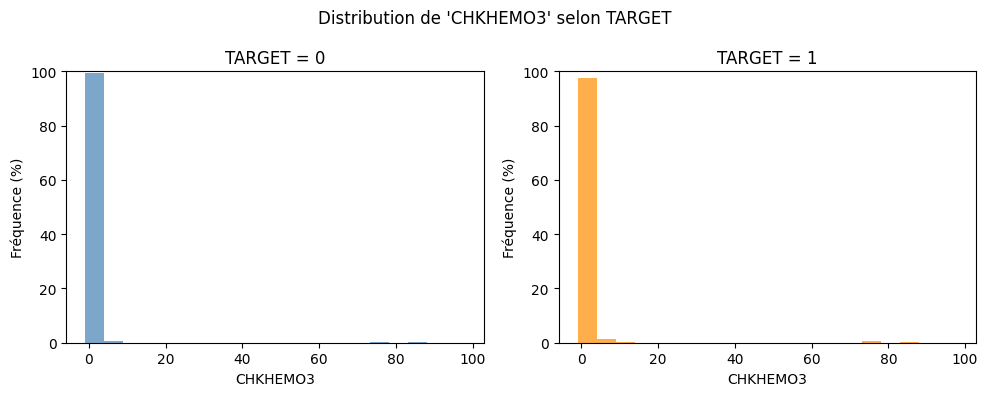

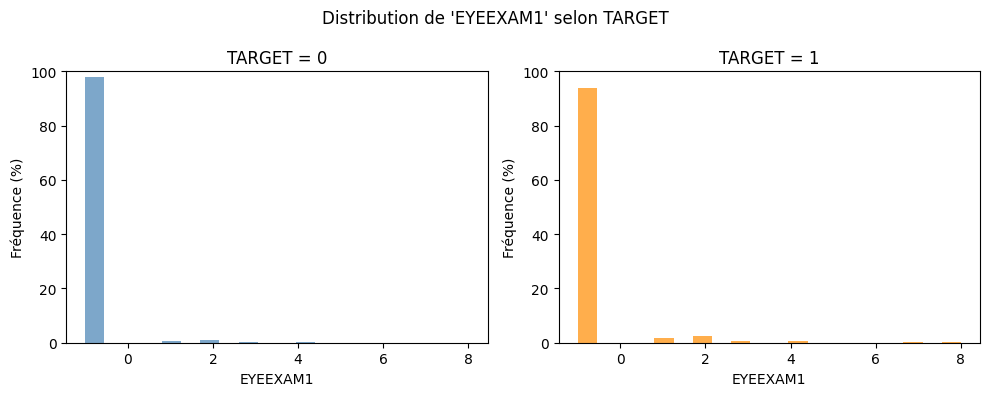

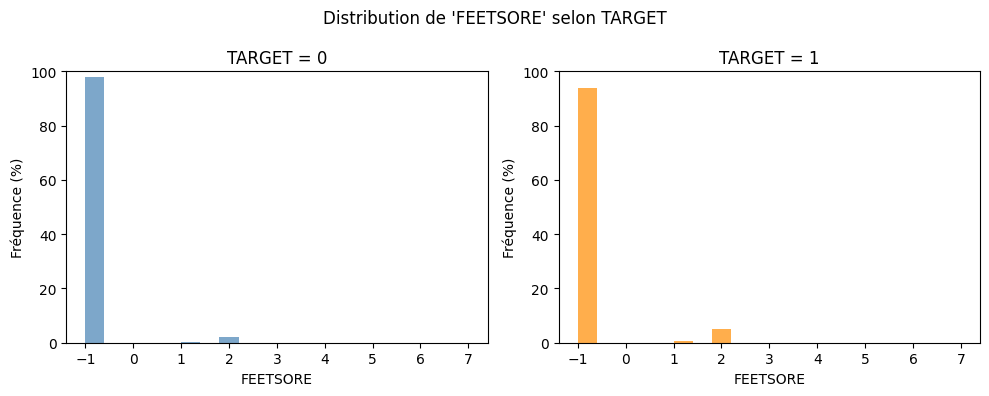

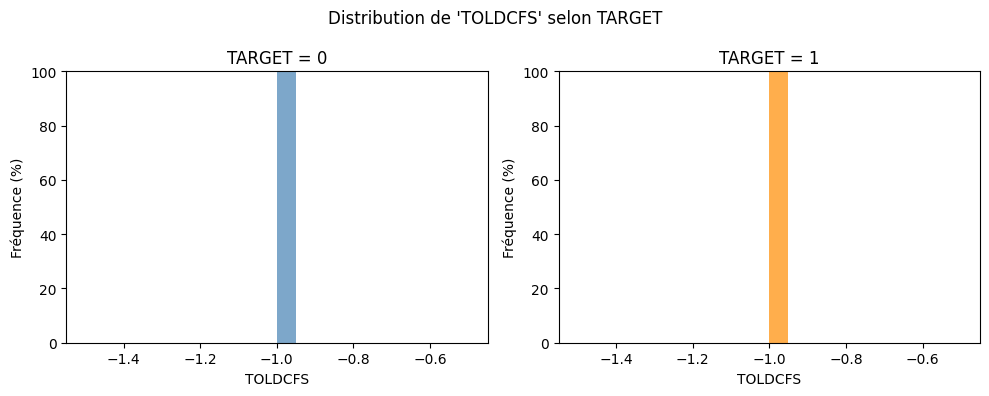

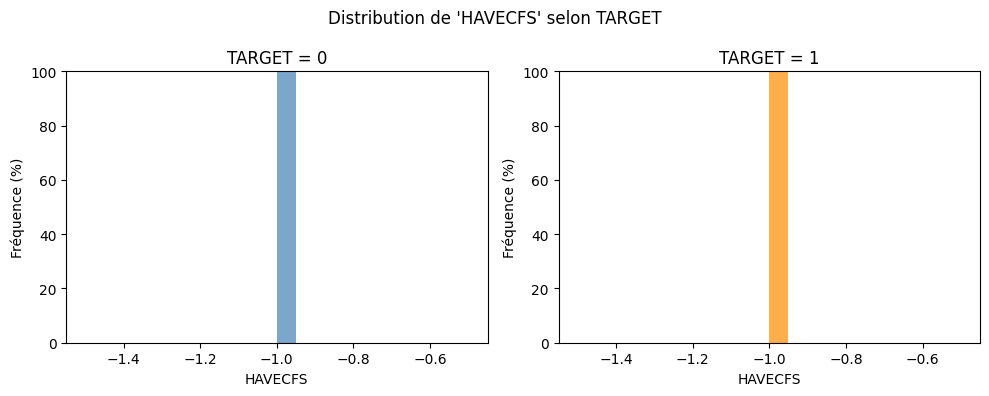

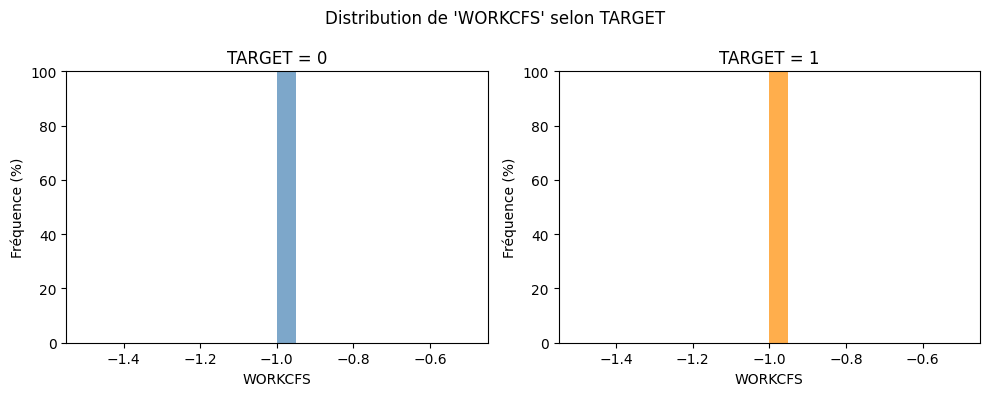

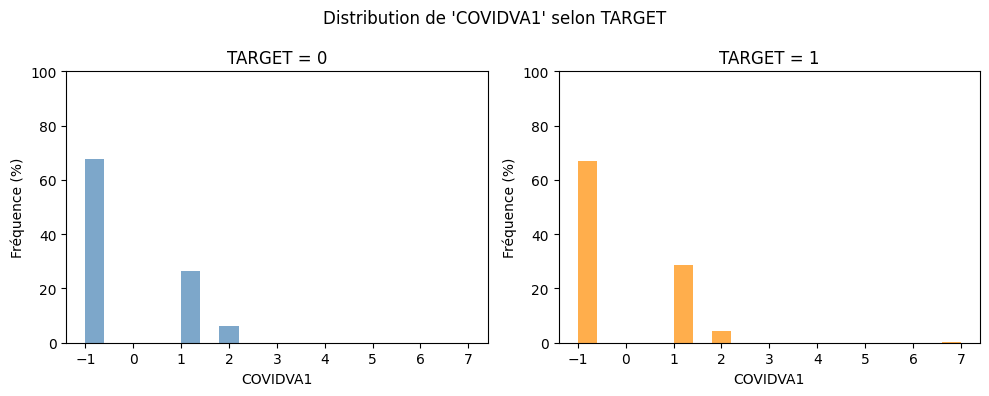

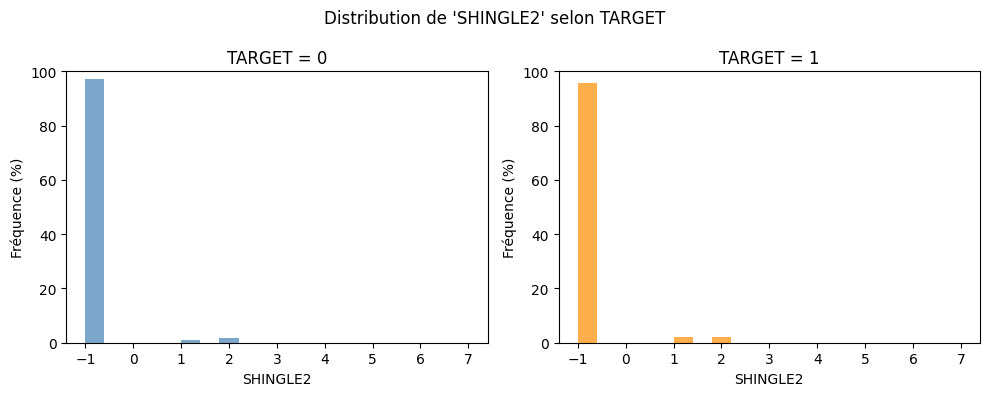

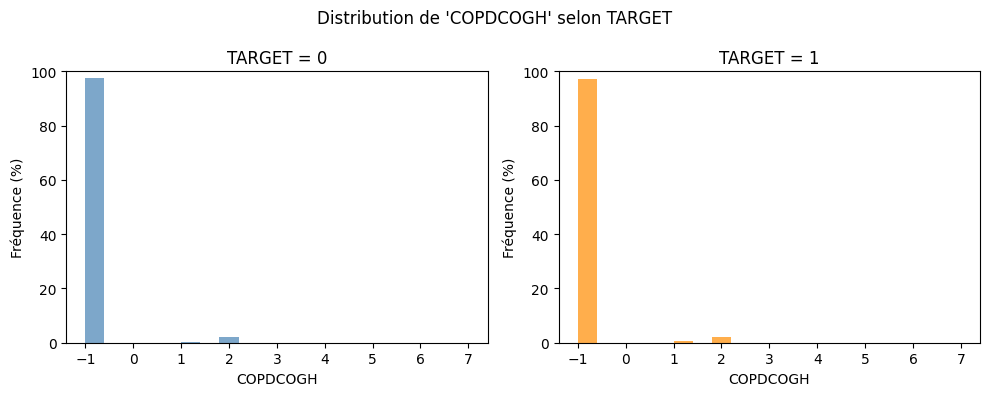

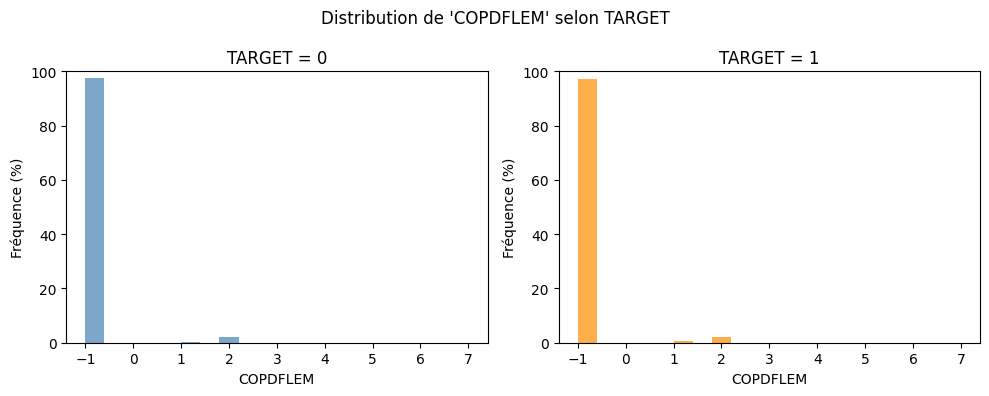

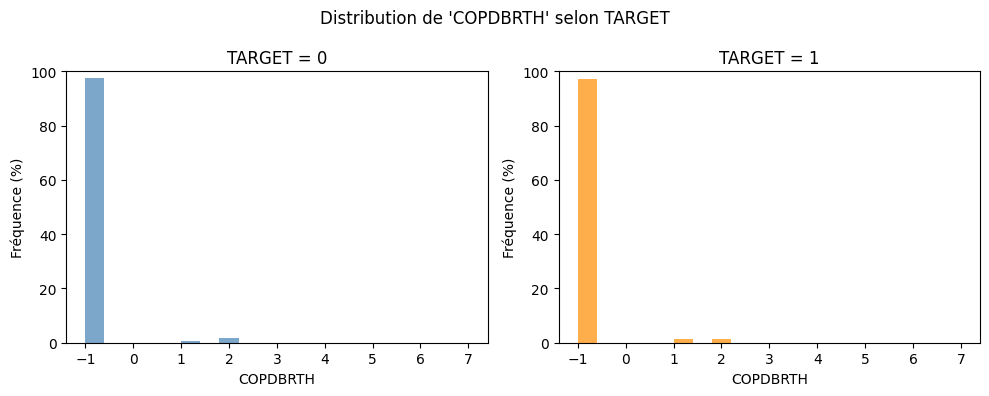

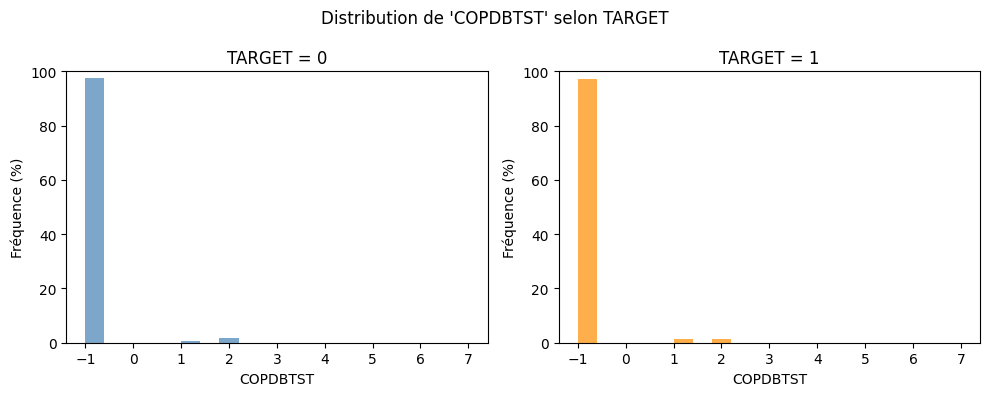

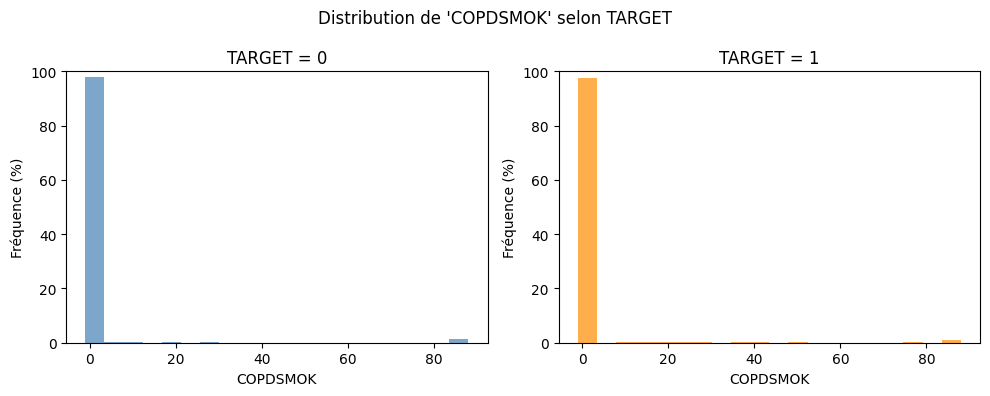

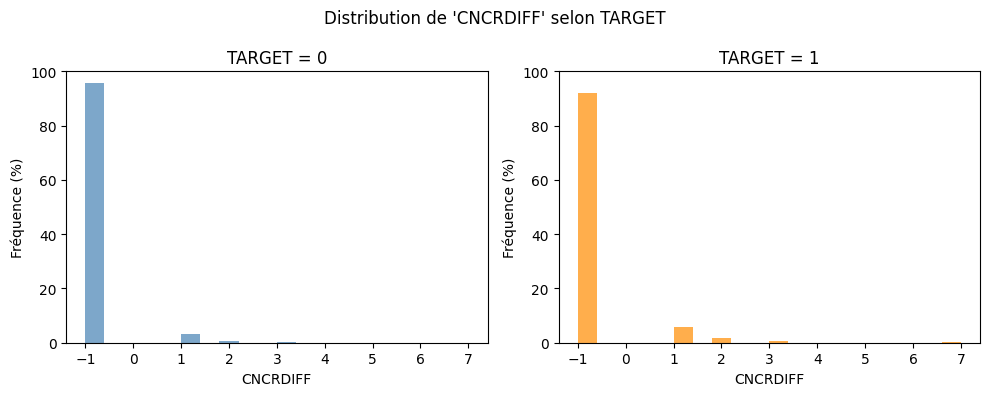

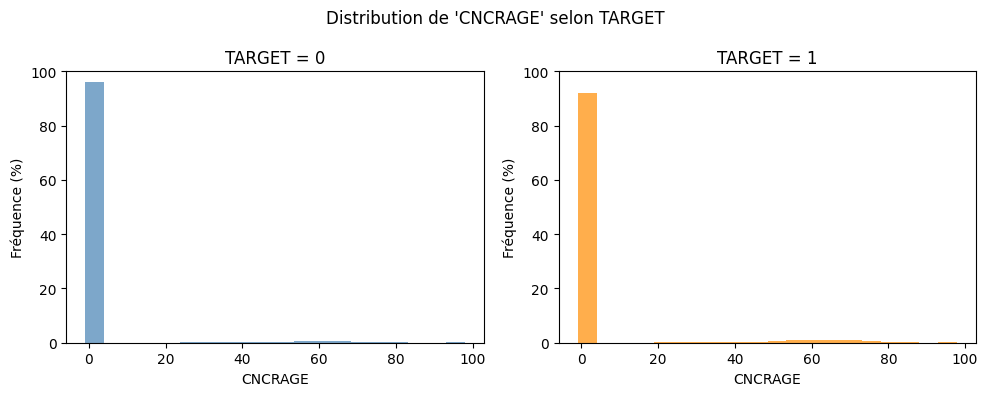

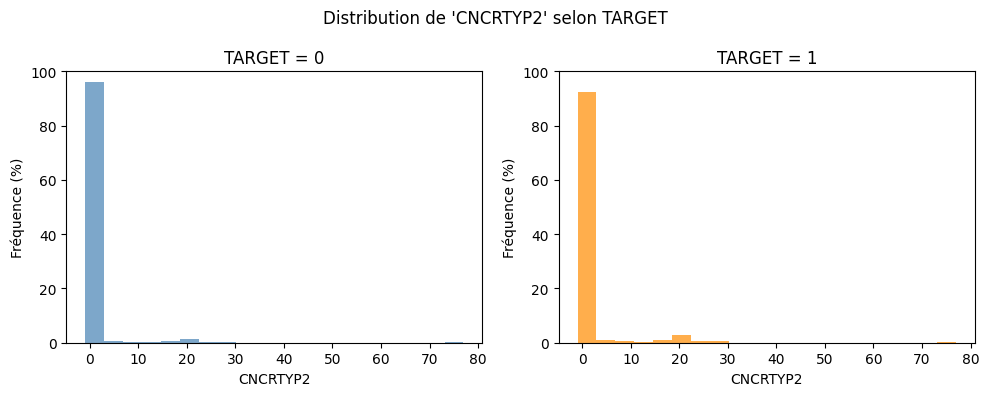

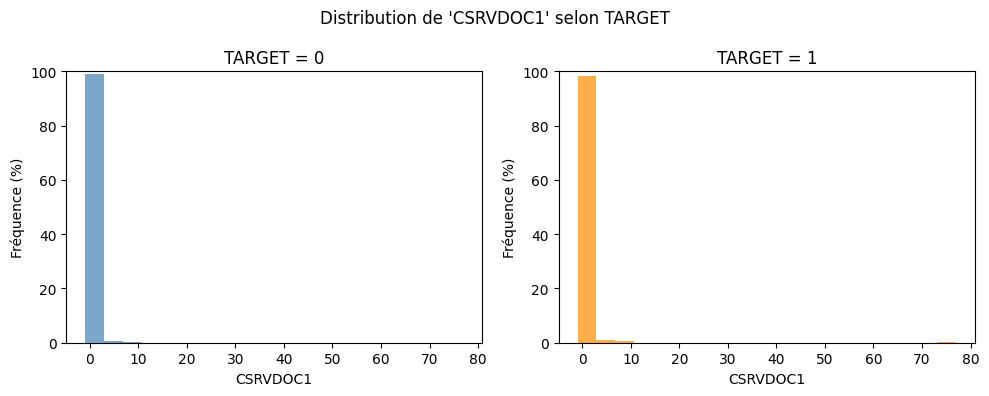

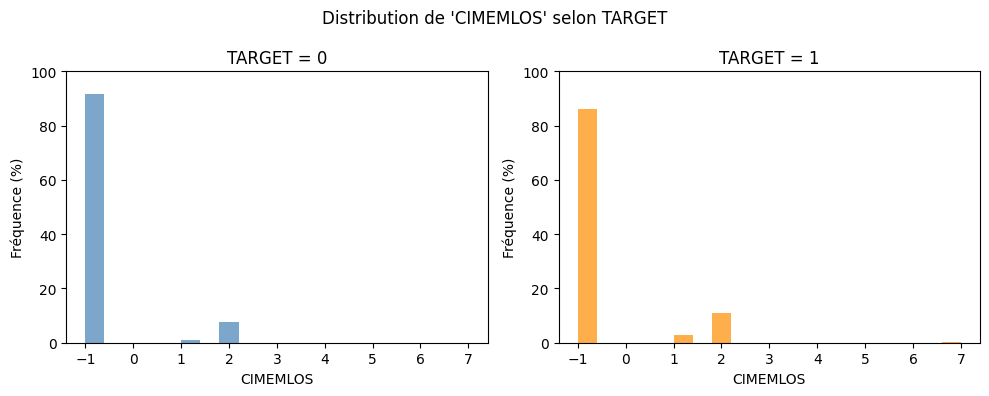

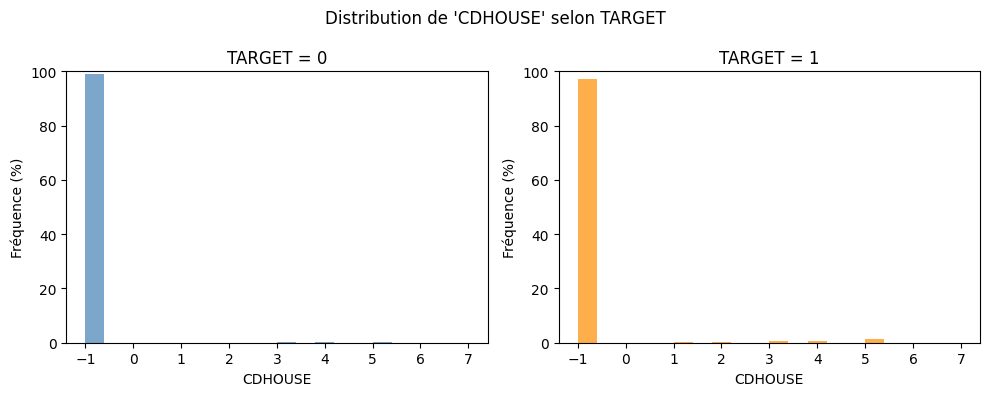

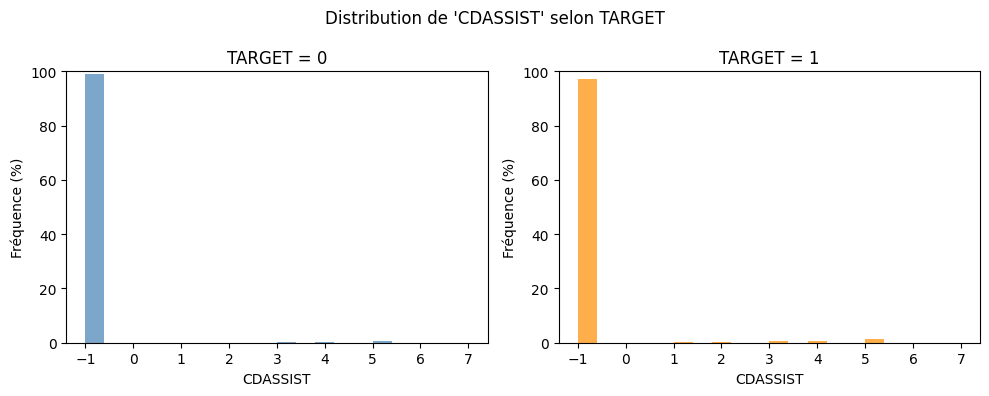

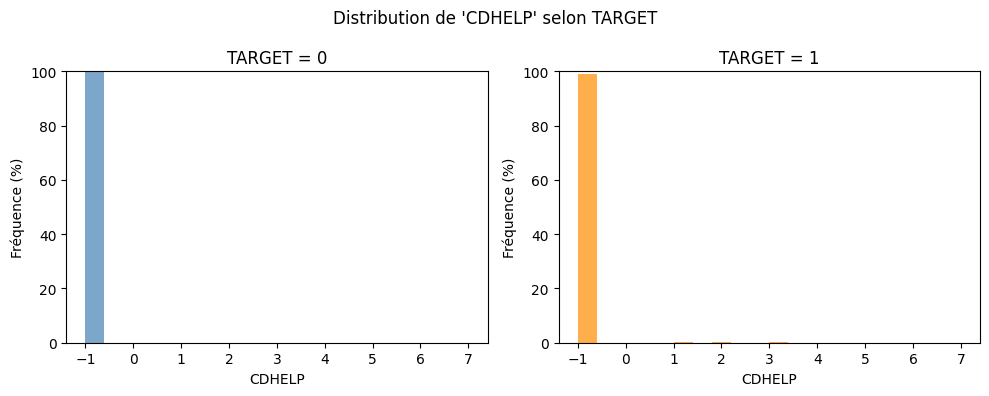

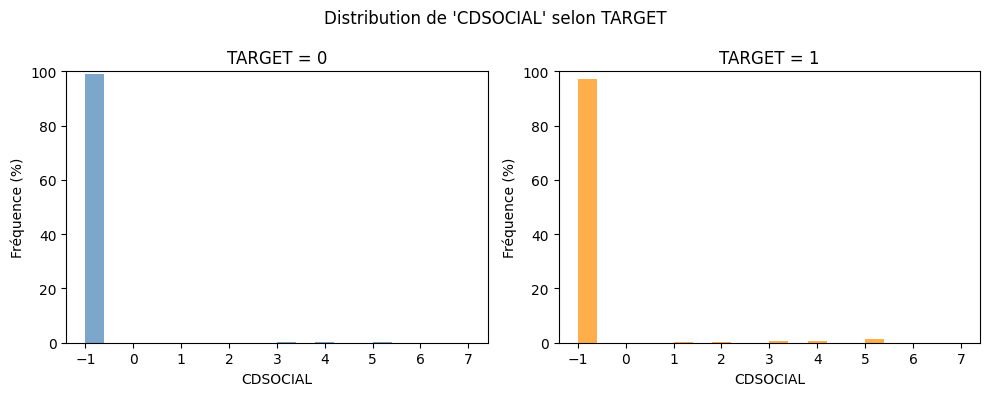

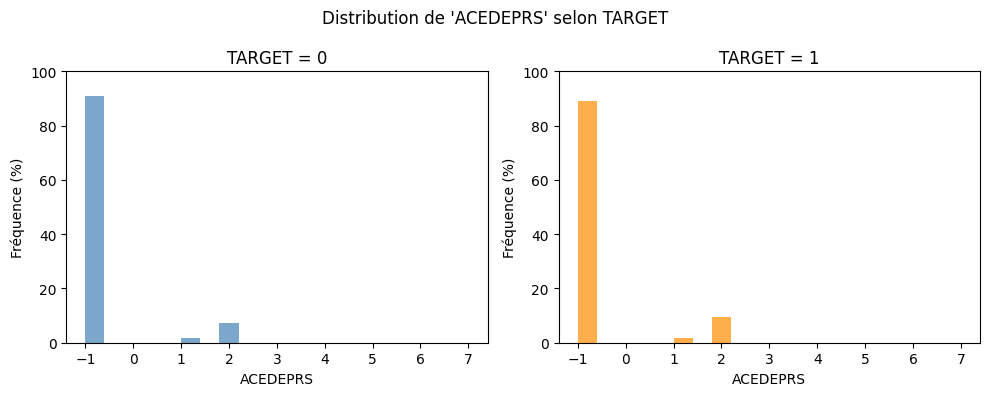

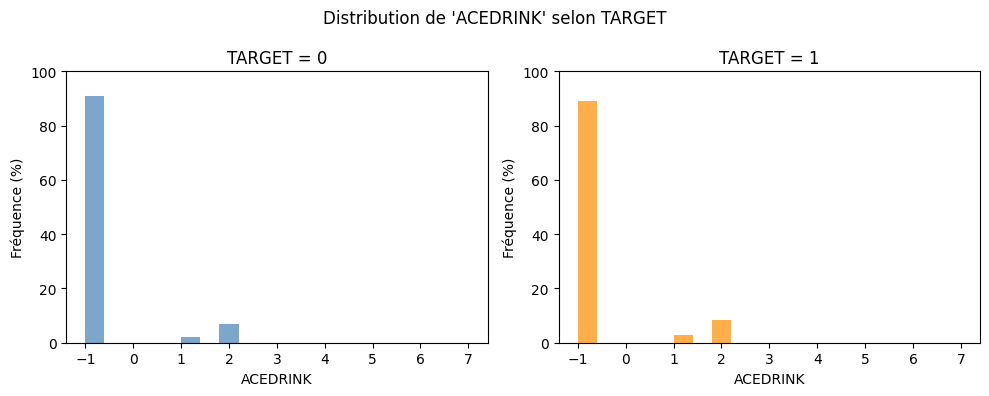

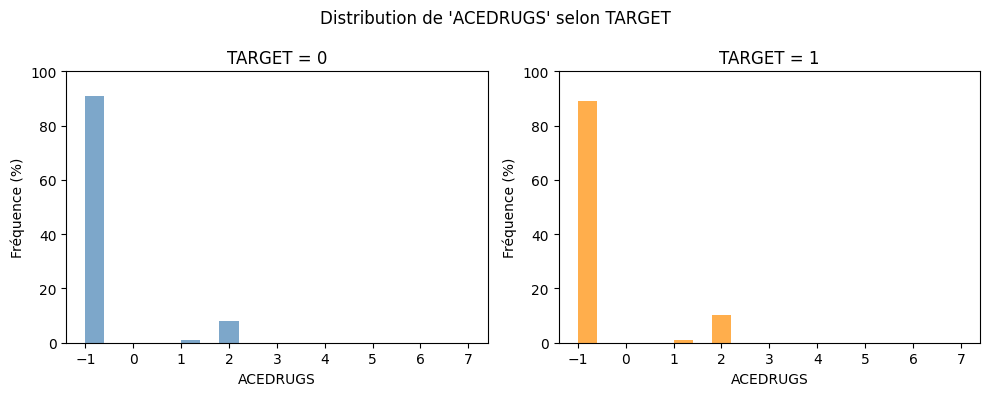

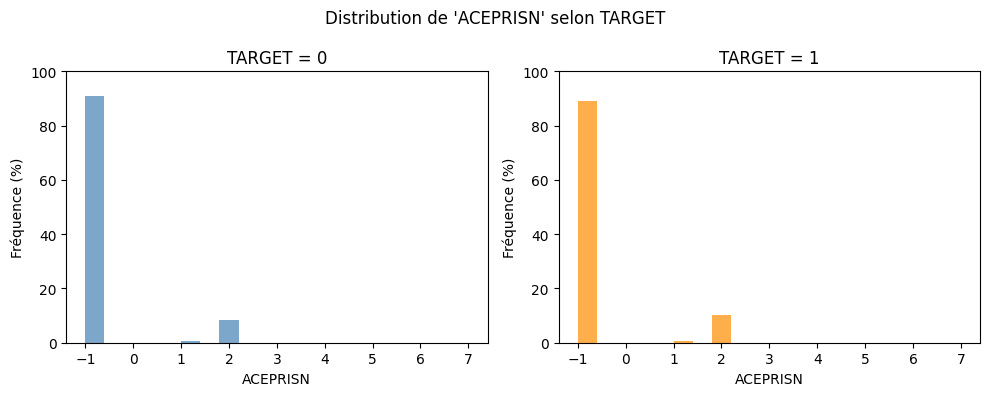

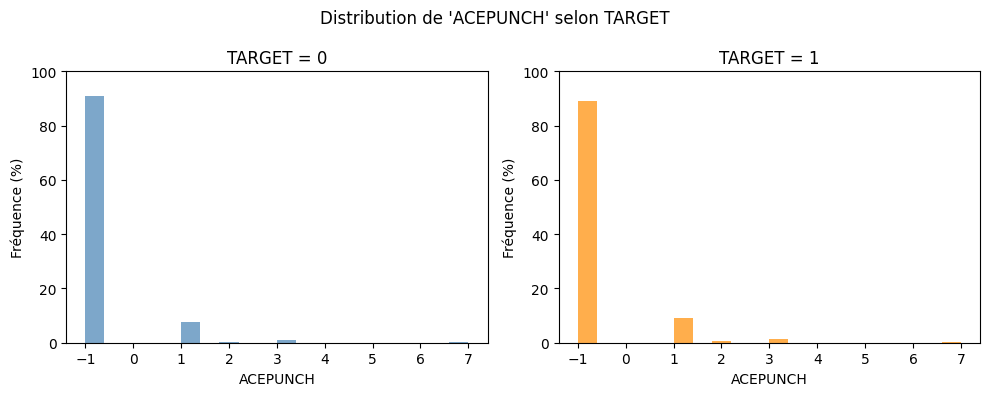

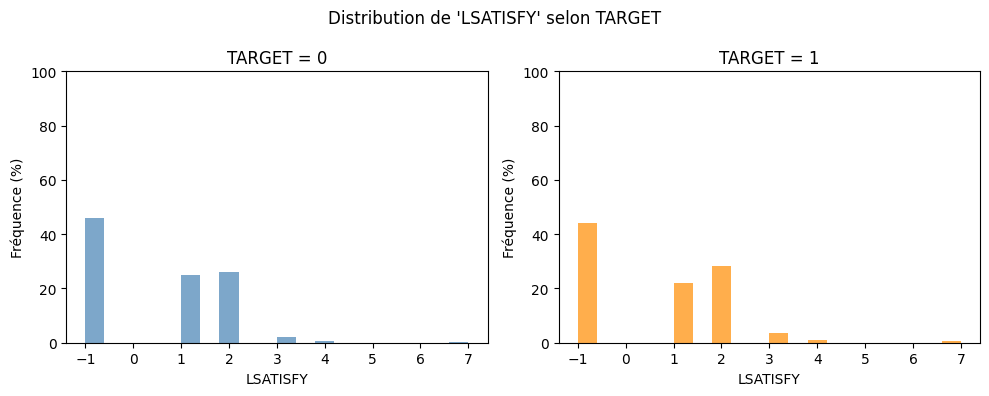

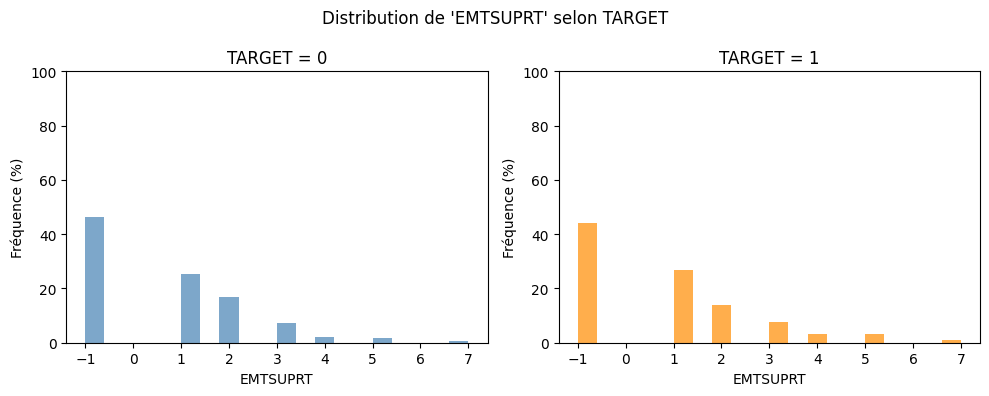

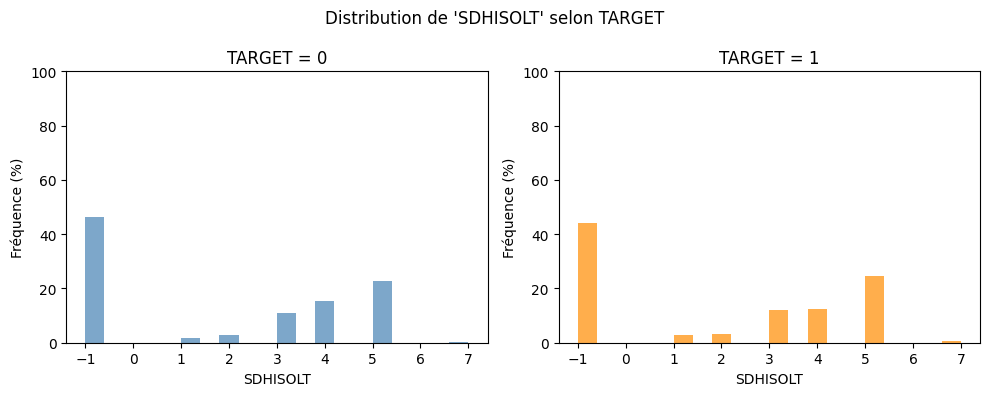

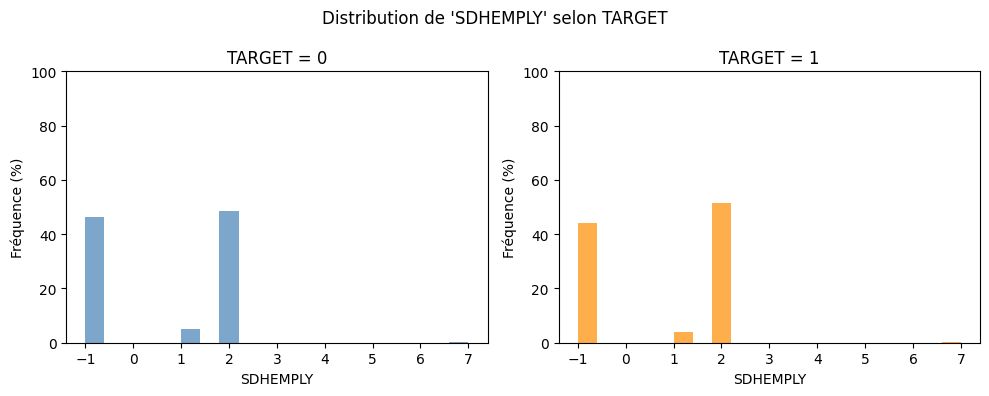

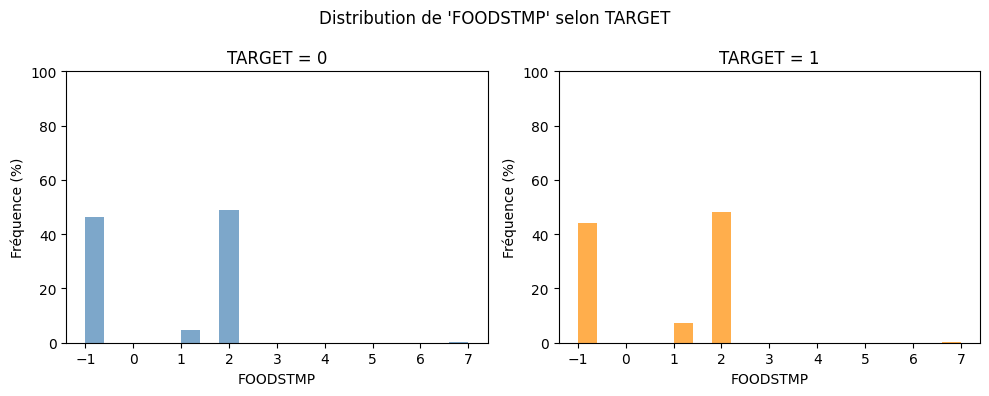

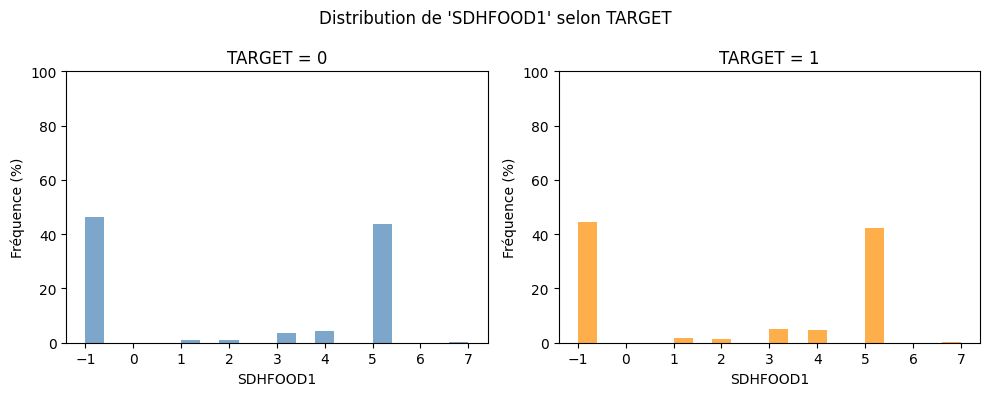

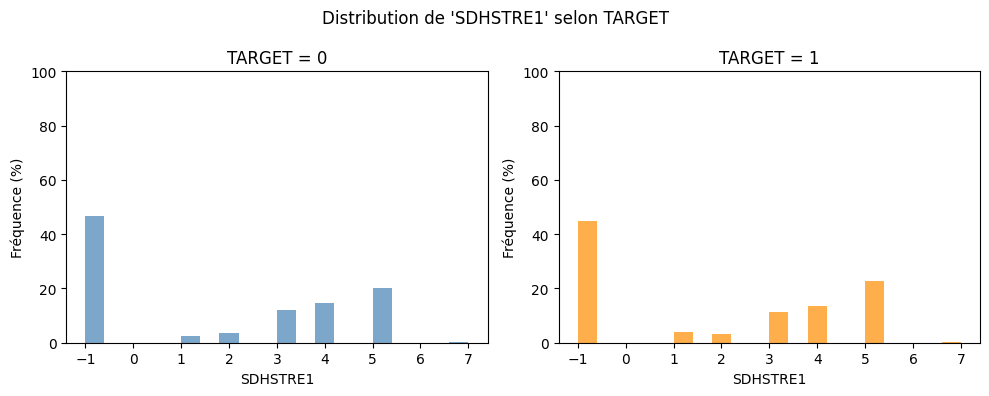

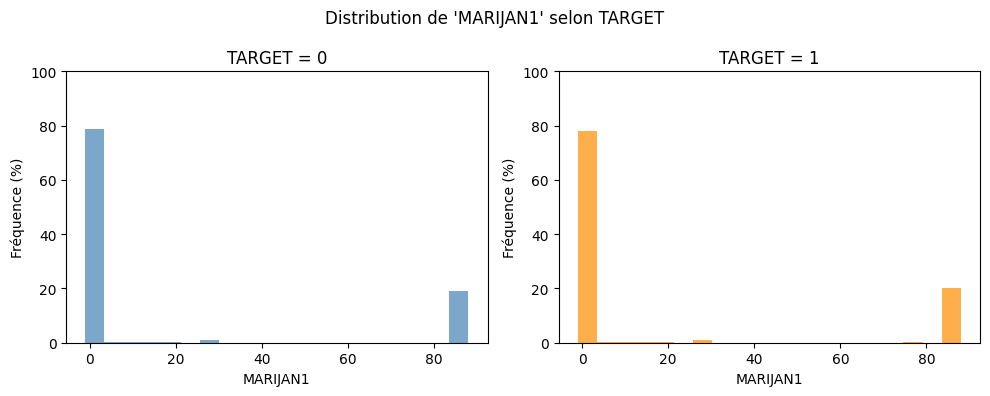

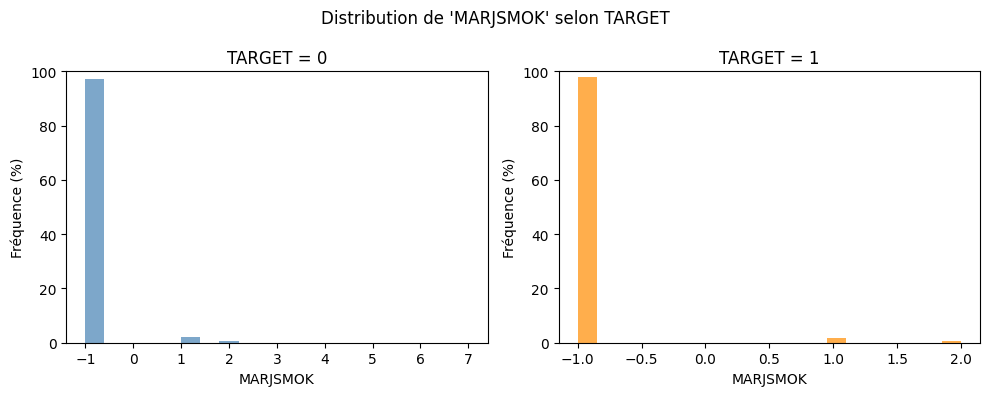

In [12]:
max_cols = 20
bins = 30

for col in columns_of_interest :  # limiter à max_cols pour éviter trop de plots
    # Ignorer les NaN
    data = features[col]
    target_clean = target.loc[data.index]
        
    # Séparer les valeurs selon la cible
    data_0 = data[target_clean == 0]
    data_1 = data[target_clean == 1]

    # Créer la figure
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Distribution de '{col}' selon TARGET", fontsize=12)

    # Histogramme pour TARGET = 0
    axes[0].hist(
        data_0,
        bins=20,
        weights=np.ones(len(data_0)) / len(data_0) * 100,
        alpha=0.7,
        color="steelblue"
    )
    axes[0].set_title("TARGET = 0")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence (%)")
    axes[0].set_ylim(0, 100)

    # Histogramme pour TARGET = 1
    axes[1].hist(
        data_1,
        bins=20,
        weights=np.ones(len(data_1)) / len(data_1) * 100,
        alpha=0.7,
        color="darkorange"
    )
    axes[1].set_title("TARGET = 1")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Fréquence (%)")
    axes[1].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

### Plot des histogrammes